In [9]:
#!python3 -m pip install wfdb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
import heartpy as hp
from scipy.fftpack import fft
import scaleogram as scg 

In [2]:
# Initiate variables
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
record_name = "../aura-data/100001/100001_ECG"
record_name_ann = "../aura-data/100001/100001_ANN"

# Import and clean data in CSV file

In [6]:
#record = wfdb.rdrecord(record_name, sampto=7047)
#df1=pd.DataFrame(data=record.adc())
#df1.to_csv(record_name+"_1.csv",index=False,header=None) #Write the list to a CSV file
df1=pd.read_csv(record_name+"_1.csv",header=None)
df1.head()

0
0  32292
1  32270
2  32272
3  32286
4  32292

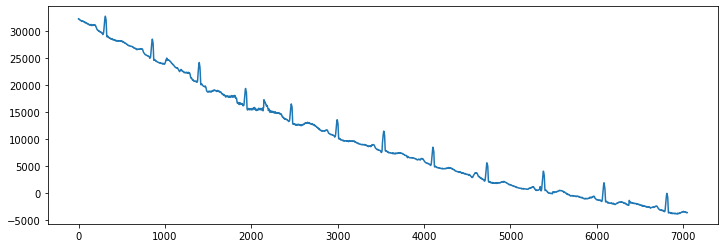

In [111]:
plt.figure(figsize=(12,4))
plt.plot(df1)
plt.show()

# Read & clean .dat/ annotation data

In [3]:
header_list = ["start1", "end1", "class1","start2", "end2", "class2","start3", "end3", "class3","start", "end", "class"]
dataann = pd.read_csv("../aura-data/100001/100001_ANN.csv", names=header_list)

In [4]:
dataann.head()

start1       end1  class1   start2      end2  class2  start3   end3  \
0        1.0   198867.0     2.0      1.0   19525.0     1.0       1   7047   
1   198868.0   320282.0     1.0  19526.0   28694.0     2.0    7048  17209   
2   320283.0   373109.0     2.0  28695.0   32739.0     1.0   17210  28390   
3   373110.0  2197974.0     1.0  32740.0   96699.0     2.0   28391  32653   
4  2197975.0  2582746.0     2.0  96700.0  110564.0     1.0   32654  71061   

   class3    start       end  class  
0       2      1.0    7047.0    2.0  
1       1   7048.0   17209.0    1.0  
2       2  17210.0   28694.0    2.0  
3       1  28695.0   32653.0    1.0  
4       2  32654.0  112474.0    2.0

In [38]:
#dataann.tail(495)
#dataann["class"].unique()
#dataann.shape

In [41]:
dataann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start1  201 non-null    float64
 1   end1    201 non-null    float64
 2   class1  201 non-null    float64
 3   start2  311 non-null    float64
 4   end2    311 non-null    float64
 5   class2  311 non-null    float64
 6   start3  1246 non-null   int64  
 7   end3    1246 non-null   int64  
 8   class3  1246 non-null   int64  
 9   start   763 non-null    float64
 10  end     763 non-null    float64
 11  class   763 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 116.9 KB


In [44]:
"""
for i in dataann_nan_class.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataann_nan_class.start[i]), sampto=int(dataann_nan_class.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataann_nan_class["class"][i]),figsize=(10,4), ecg_grids='all')
    if i > 205:
        break
"""

'\nfor i in dataann_nan_class.index:\n    record = wfdb.rdrecord(record_name, sampfrom=int(dataann_nan_class.start[i]), sampto=int(dataann_nan_class.end[i]))\n    wfdb.plot_wfdb(record=record, title=str(dataann_nan_class["class"][i]),figsize=(10,4), ecg_grids=\'all\')\n    if i > 205:\n        break\n'

In [38]:
dataann.dropna().shape

(201, 12)

In [37]:
dataannclear = dataann.dropna()
dataannclear.astype('int32').dtypes
dataannclear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start1  201 non-null    float64
 1   end1    201 non-null    float64
 2   class1  201 non-null    float64
 3   start2  201 non-null    float64
 4   end2    201 non-null    float64
 5   class2  201 non-null    float64
 6   start3  201 non-null    int64  
 7   end3    201 non-null    int64  
 8   class3  201 non-null    int64  
 9   start   201 non-null    float64
 10  end     201 non-null    float64
 11  class   201 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 20.4 KB


In [5]:
dataannclear = dataann[dataann["class"].notnull() & dataann["start"].notnull() & dataann["end"].notnull() ] # dataann["class1"].isna() & 
dataannclear.head()

start1       end1  class1   start2      end2  class2  start3   end3  \
0        1.0   198867.0     2.0      1.0   19525.0     1.0       1   7047   
1   198868.0   320282.0     1.0  19526.0   28694.0     2.0    7048  17209   
2   320283.0   373109.0     2.0  28695.0   32739.0     1.0   17210  28390   
3   373110.0  2197974.0     1.0  32740.0   96699.0     2.0   28391  32653   
4  2197975.0  2582746.0     2.0  96700.0  110564.0     1.0   32654  71061   

   class3    start       end  class  
0       2      1.0    7047.0    2.0  
1       1   7048.0   17209.0    1.0  
2       2  17210.0   28694.0    2.0  
3       1  28695.0   32653.0    1.0  
4       2  32654.0  112474.0    2.0

In [6]:
len(dataannclear.index)

763

In [157]:
len(dataannclear[dataannclear["class"]==1])

379

In [156]:
len(dataannclear[dataannclear["class"]==2])

382

In [158]:
len(dataannclear[dataannclear["class"]==3])

2

In [161]:
record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[0]), sampto=int(dataannclear.end[0]))
len(record.adc()) > 65536

False

In [177]:
j = 0
for i in dataannclear.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    if len(record.adc()) >= 65536:
        print("indice :",i)
        print("class : ", dataannclear["class"][i])
        j+=1

indice : 4
class :  2.0
indice : 7
class :  1.0
indice : 9
class :  1.0
indice : 10
class :  2.0
indice : 14
class :  2.0
indice : 15
class :  1.0
indice : 17
class :  1.0
indice : 21
class :  1.0
indice : 22
class :  2.0
indice : 26
class :  2.0
indice : 29
class :  1.0
indice : 30
class :  2.0
indice : 31
class :  1.0
indice : 33
class :  1.0
indice : 35
class :  1.0
indice : 36
class :  2.0
indice : 37
class :  1.0
indice : 39
class :  1.0
indice : 41
class :  1.0
indice : 43
class :  1.0
indice : 45
class :  1.0
indice : 47
class :  1.0
indice : 49
class :  1.0
indice : 51
class :  1.0
indice : 55
class :  1.0
indice : 59
class :  1.0
indice : 61
class :  1.0
indice : 65
class :  1.0
indice : 67
class :  1.0
indice : 69
class :  1.0
indice : 71
class :  1.0
indice : 73
class :  1.0
indice : 75
class :  1.0
indice : 77
class :  1.0
indice : 78
class :  2.0
indice : 79
class :  1.0
indice : 82
class :  2.0
indice : 83
class :  1.0
indice : 84
class :  2.0
indice : 85
class :  1.0
ind

In [178]:
record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[4]), sampto=int(dataannclear.end[4]))

In [181]:
len(record.adc())

79820

In [10]:
class_1, class_2, ann_1, ann_2 = [],[],[],[]
for i in dataannclear.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    if len(record.adc()) >= 65536:
        if dataannclear["class"][i] == 1:
            class_1.append(record.adc()[:65536])
            ann_1.append(dataannclear["class"][i])
        if dataannclear["class"][i] == 2:
            class_2.append(record.adc()[:65536])
            ann_2.append(dataannclear["class"][i])

In [19]:
len(class_1[:10])

10

In [20]:
len(class_2[:10])

10

In [18]:
len(ann_1)

130

In [25]:
#Preparing data
sample_size = 1 
class_1_split_256 = [np.array_split(class_1[:sample_size][ii], 256) for ii in range(len(class_1[:sample_size]))]
class_1_flatten = [item for sublist in class_1_split_256 for item in sublist]

class_2_split_256 = [np.array_split(class_2[:sample_size][ii], 256) for ii in range(len(class_2[:sample_size]))]
class_2_flatten = [item for sublist in class_2_split_256 for item in sublist]

In [26]:
reduce_size = 500
full_1500 = (class_1_flatten[0:reduce_size] + class_2_flatten[0:reduce_size])

In [27]:
len(full_1500)

512

In [28]:
# create the data set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pywt


fs = len(full_1500[0])
sgn_length = 2000   #65536   Pay atention with ram memory! 
size_dataset = len(full_1500)
scales = range(1, fs)
waveletname = 'morl'
 
X_full = np.ndarray(shape=(size_dataset, fs-1, fs-1, 3))
                 
for i in range(0, size_dataset):
    if i % 500 == 0:
        print (i, 'done!')
    for j in range(0, 3):
        signal = full_1500[i]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        X_full[i, :, :, j] = coeff[:,:fs-1].reshape(255,255)

0 done!


KeyboardInterrupt: 

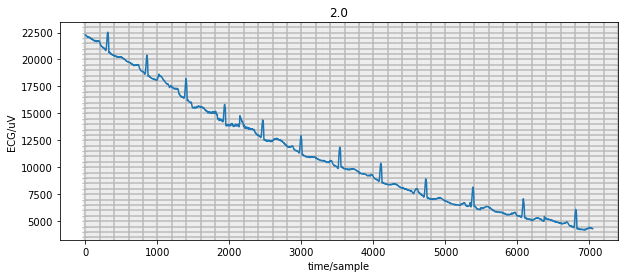

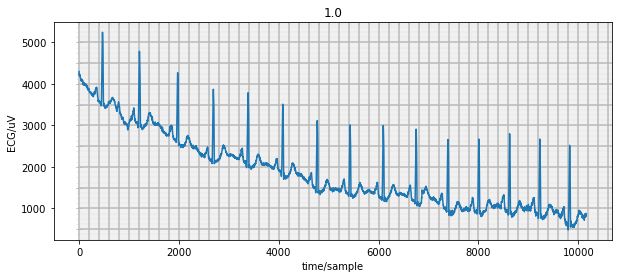

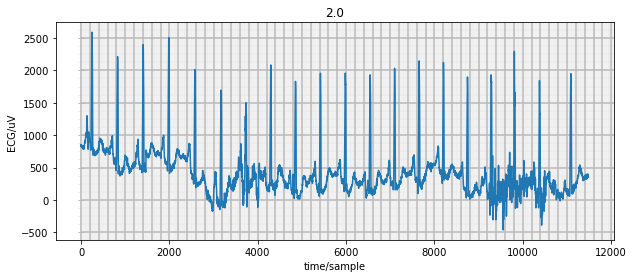

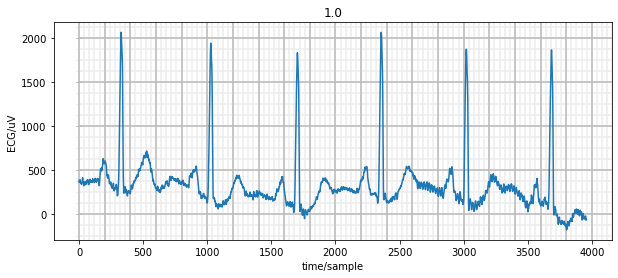

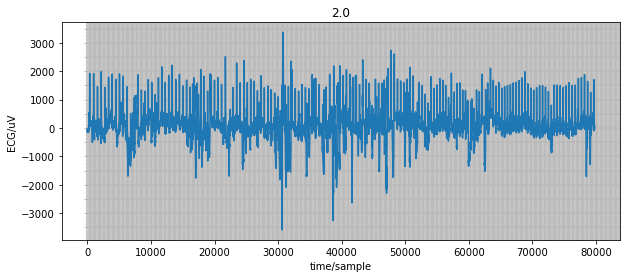

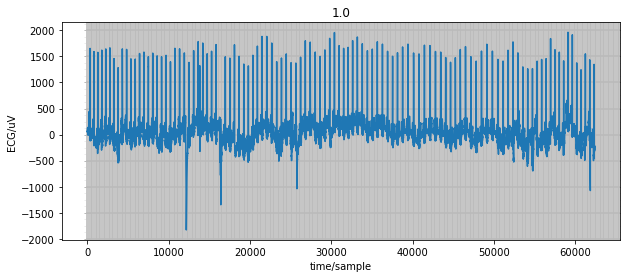

In [38]:
for i in dataannclear.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataannclear["class"][i]),figsize=(10,4), ecg_grids='all')
    if i > 4:
        break

In [125]:
dataanclear_1 = dataannclear[dataannclear["class"]==1]

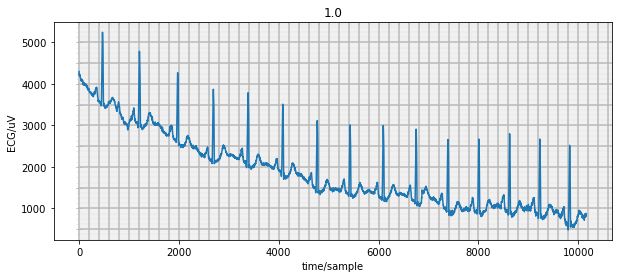

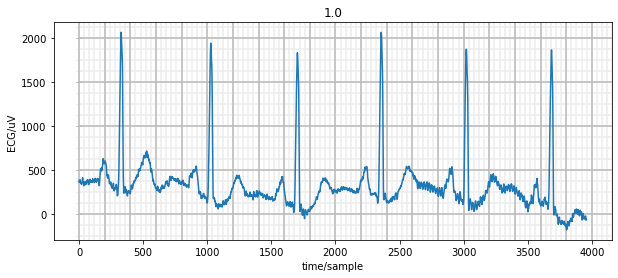

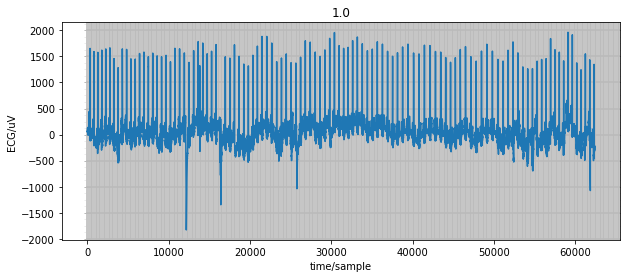

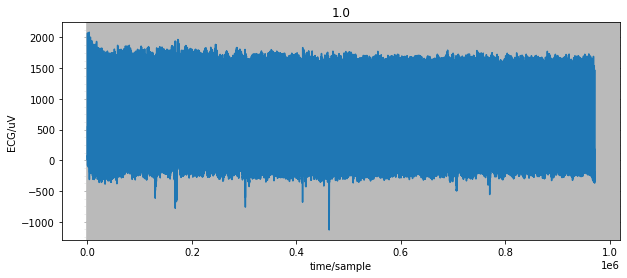

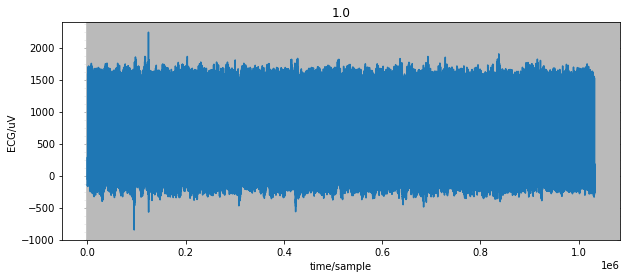

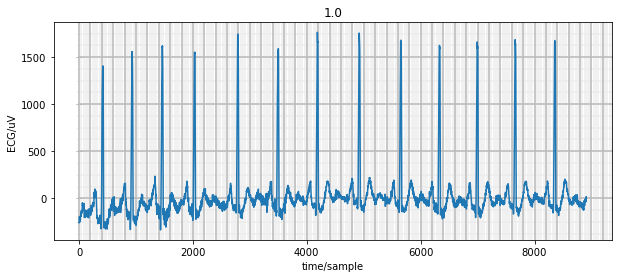

In [43]:
dataanclear_1 = dataannclear[dataannclear["class"]==1]
for i in dataanclear_1.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataanclear_1.start[i]), sampto=int(dataanclear_1.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataanclear_1["class"][i]),figsize=(10,4), ecg_grids='all')
    if i > 10:
        break

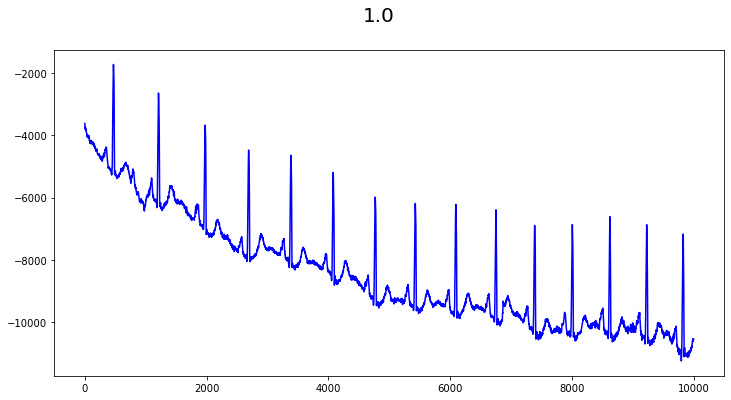

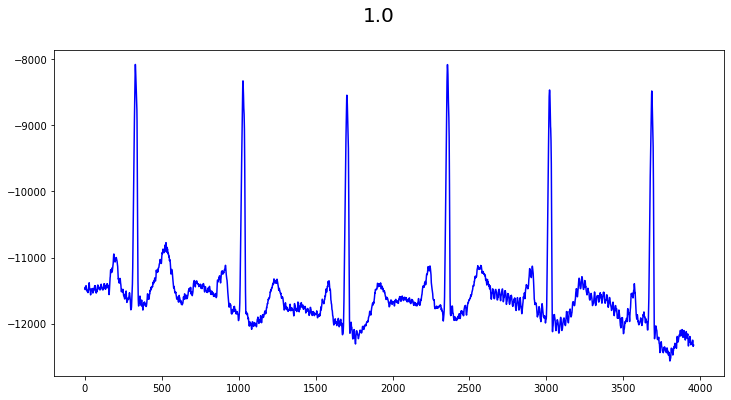

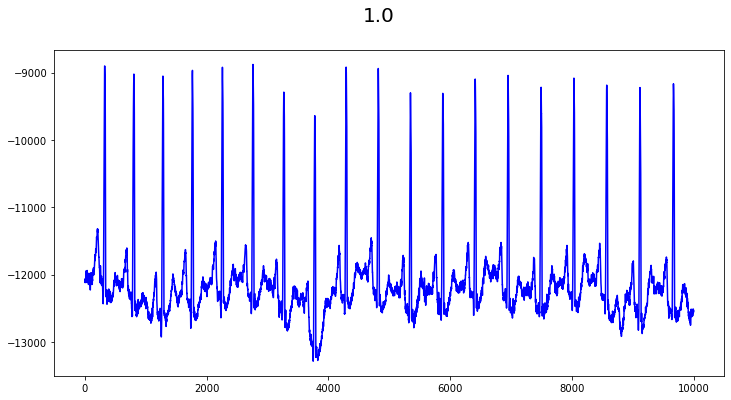

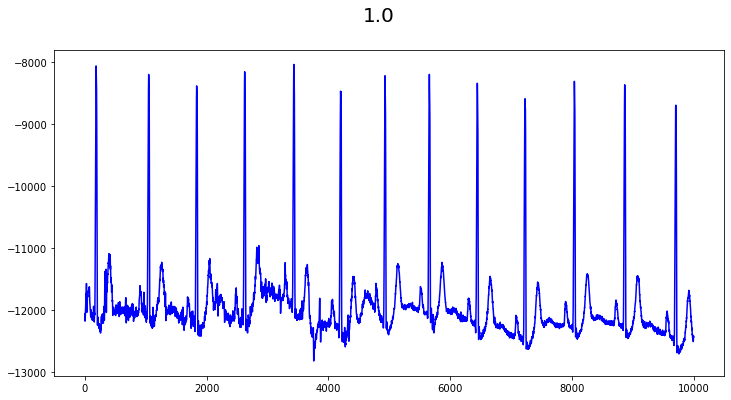

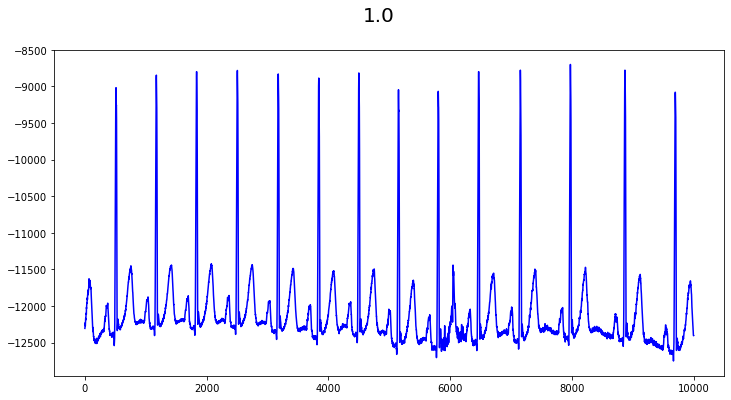

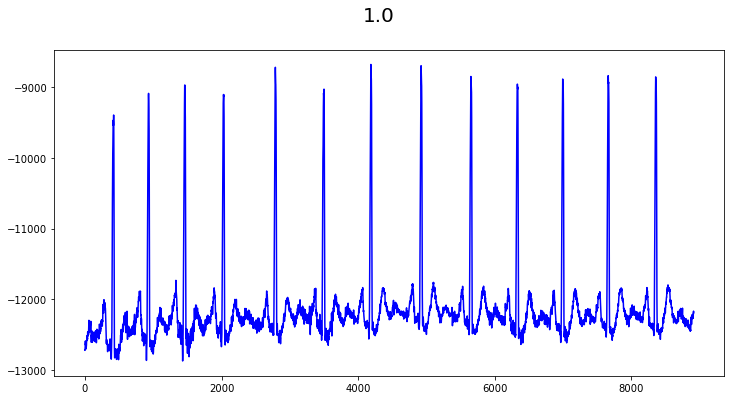

In [55]:
for i in dataanclear_1.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataanclear_1.start[i]), sampto=int(dataanclear_1.end[i]))
    #wfdb.plot_wfdb(record=record, title=str(dataanclear_1["class"][i]),figsize=(10,4), ecg_grids='all')
    # Data Visualization
    fig = plt.figure(figsize=(12, 6))
    plt.plot(range(0, len(record.adc()[:10000]), 1), record.adc()[:10000], color = 'blue')
    #plt.set_xlim(0, 1000)
    fig.suptitle(str(dataanclear_1["class"][i]), fontsize=20) #ax.set_title(str(dataanclear_1["class"][i]))
    if i > 10:
        break

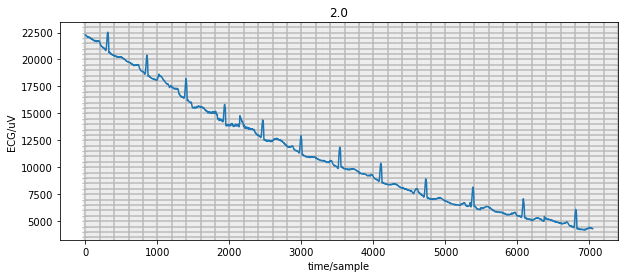

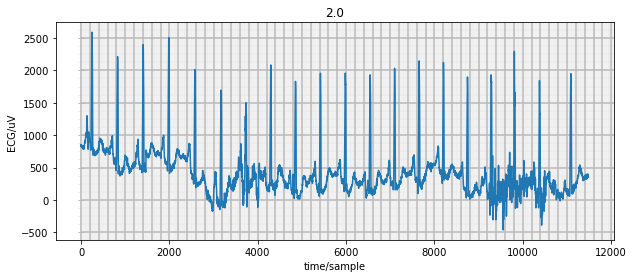

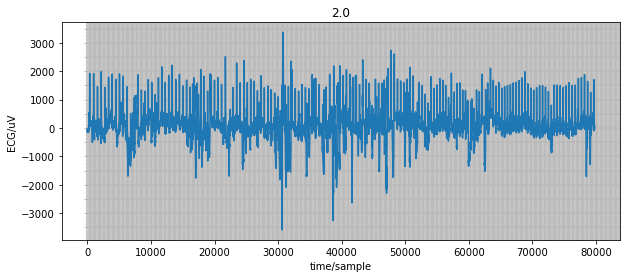

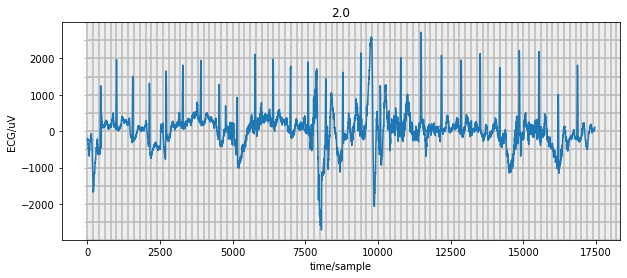

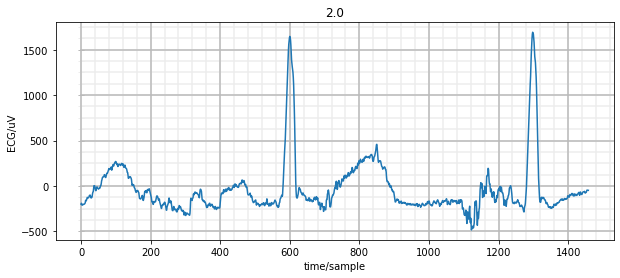

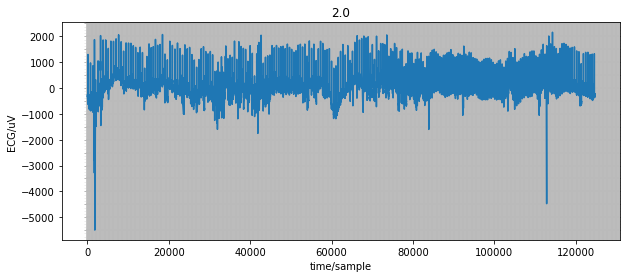

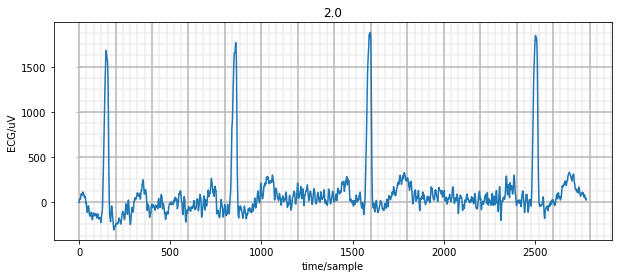

In [49]:
dataanclear_2 = dataannclear[dataannclear["class"]==2]
for i in dataanclear_2.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataanclear_2.start[i]), sampto=int(dataanclear_2.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataanclear_2["class"][i]),figsize=(10,4), ecg_grids='all')
    if i > 10:
        break

# EDA Octo

Text(0.5, 1.0, 'ARR Signal')

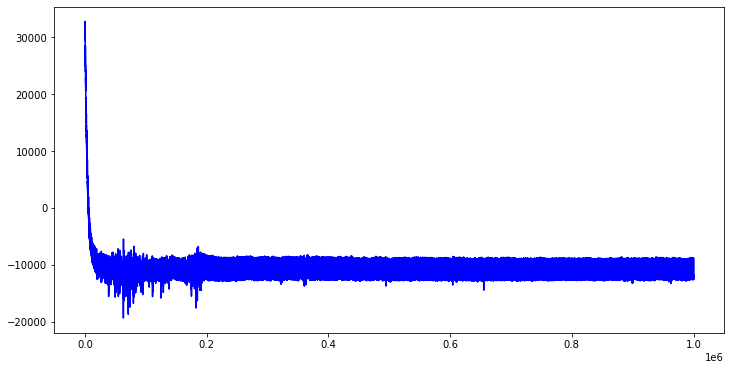

In [29]:

# Data Visualization
fig = plt.figure(figsize=(12, 6))

plt.plot(range(0, len(record.adc()[:1000000]), 1), record.adc()[:1000000], color = 'blue')
#arr_signal.set_xlim(0, 1000)
arr_signal.set_title('ARR Signal')

## FFT module test

Text(0.5, 1.0, 'FFT of full signal')

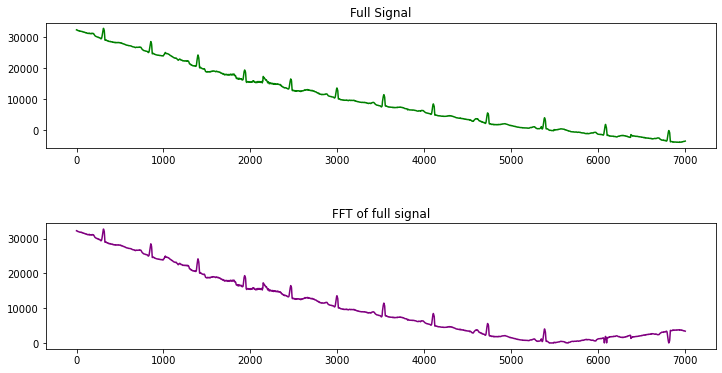

In [61]:
#Arr signal Fourier Transform with one signal
record = wfdb.rdrecord(record_name, sampto=7000).adc()
full_signal_fft_values = np.abs(fft(record.adc()))
x_values_fft = range(0, len(record.adc()), 1)[:10000]

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(x_values_fft, record.adc(), color = 'green')
#full_signal.set_xlim(0, 512)
full_signal.set_title('Full Signal')
fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
#fft_comp.set_xlim(0, 512)
#fft_comp.set_ylim(0, 100)
fft_comp.set_title('FFT of full signal')

#fig.savefig('Figure_3.png')   # save the figure to file
#plt.close(fig)

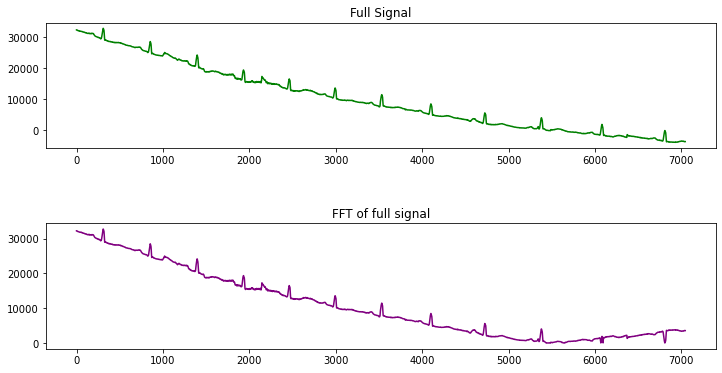

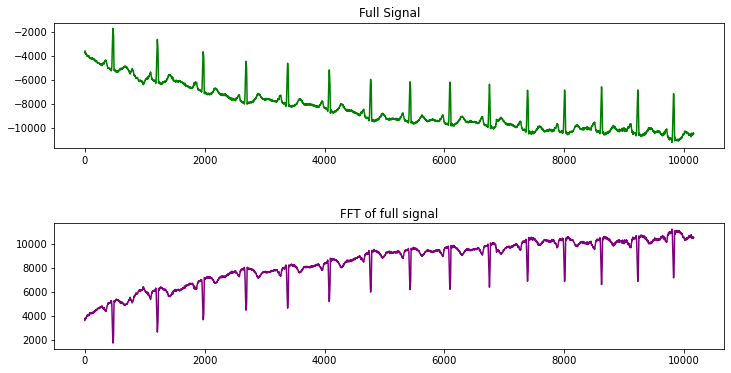

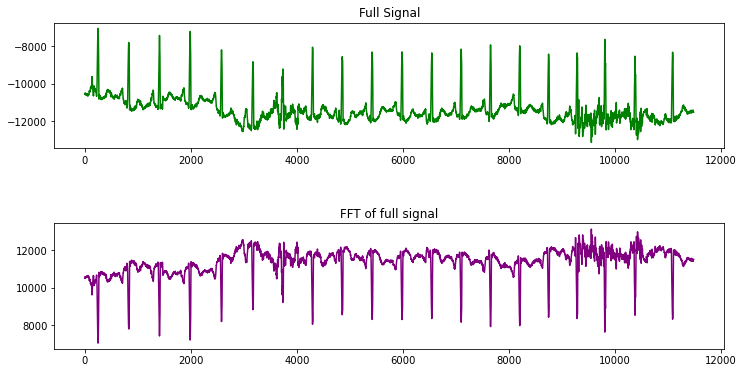

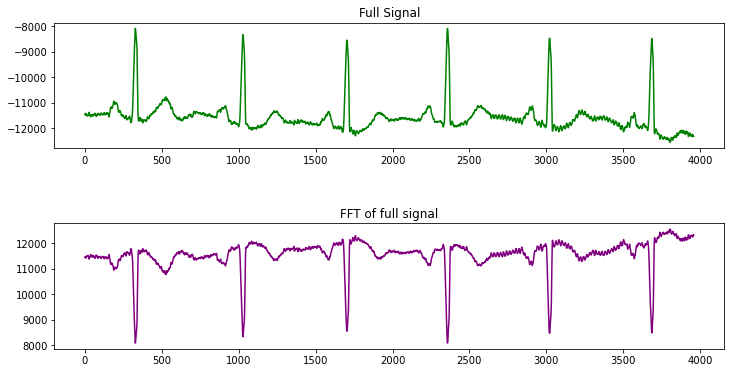

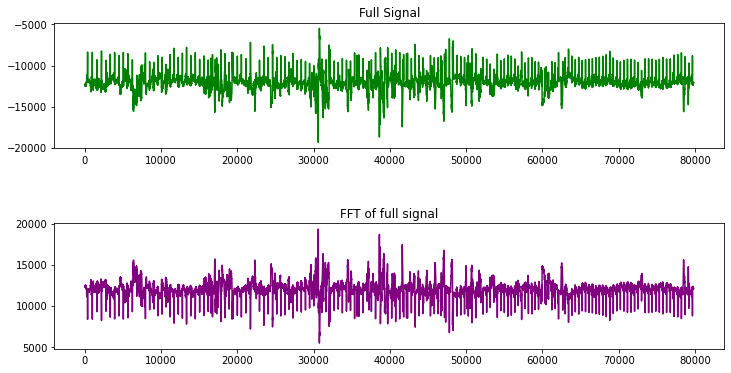

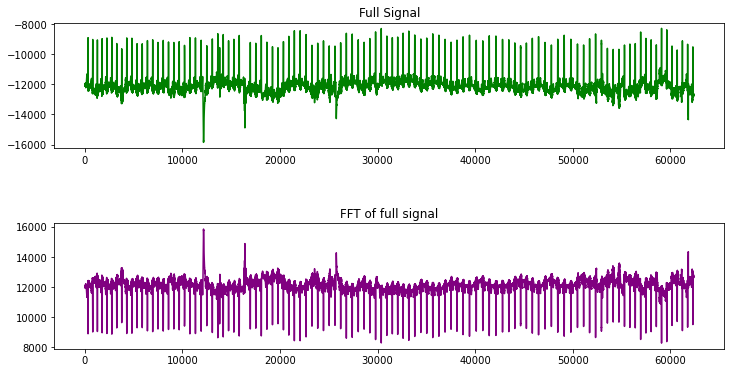

In [110]:
#Arr signal Fourier Transform with multiple signals
for i in dataannclear.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    #wfdb.plot_wfdb(record=record, title=str(dataannclear["class"][i]),figsize=(10,4), ecg_grids='all')
    full_signal_fft_values = np.abs(fft(record.adc()))
    x_values_fft = range(0, len(record.adc()), 1)

    fig = plt.figure(figsize=(12, 6))
    grid = plt.GridSpec(2, 1,hspace=0.6)

    full_signal = fig.add_subplot(grid[0, 0])
    fft_comp = fig.add_subplot(grid[1, 0])

    full_signal.plot(x_values_fft, record.adc(), color = 'green')
    #full_signal.set_xlim(0, 512)
    full_signal.set_title('Full Signal')
    fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
    #fft_comp.set_xlim(0, 512)
    #fft_comp.set_ylim(0, 100)
    fft_comp.set_title('FFT of full signal')

    #fig.savefig('Figure_3.png')   # save the figure to file
    #plt.close(fig)
    if i > 4:
        break

In [ ]:
# Comments : 
# File .dat/ .csv with annotation
# A lot of different period 
# A lot of 1 & 2 in the CSV file
# Signal analysis -> FFT : frequence, not period
# -> Wavelet : frequence + period
# Scaleogram : observe image with warming color for peak 
# Algorithm classification image in 3 classes 

## Scaleogram test

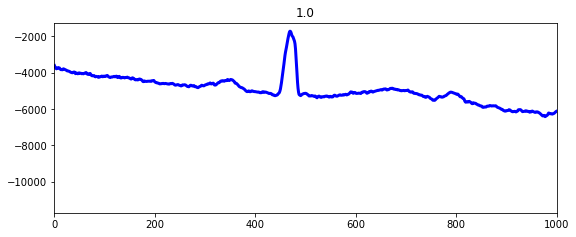

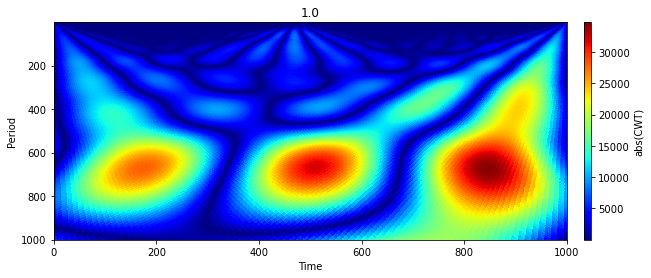

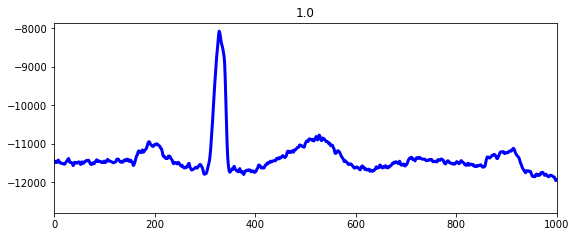

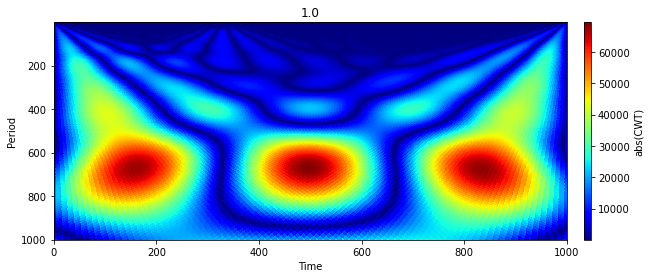

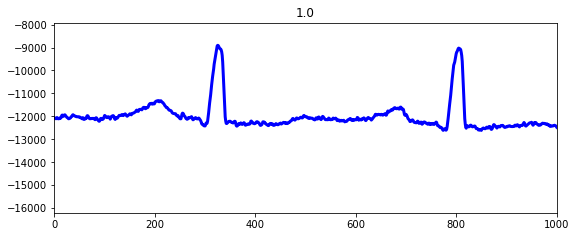

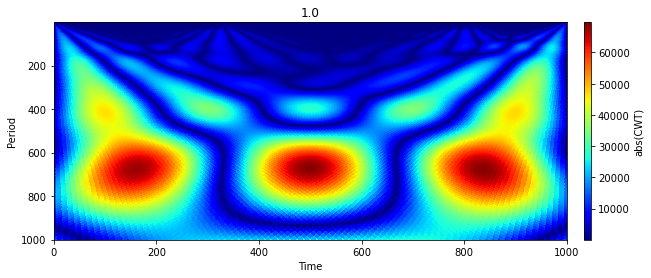

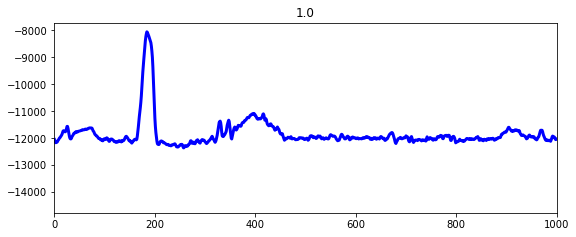

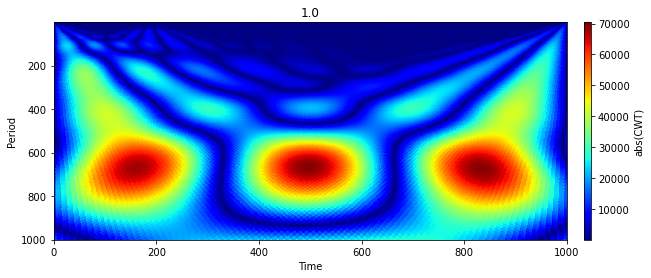

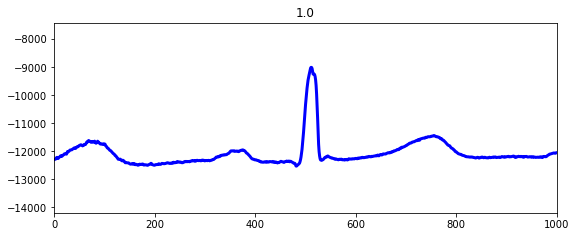

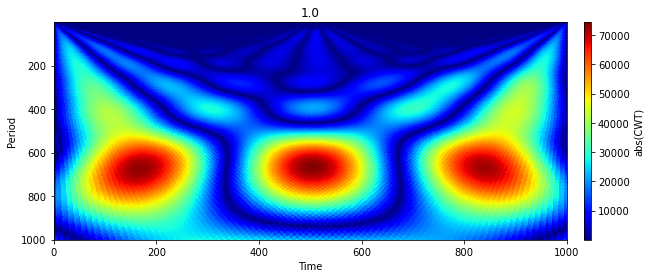

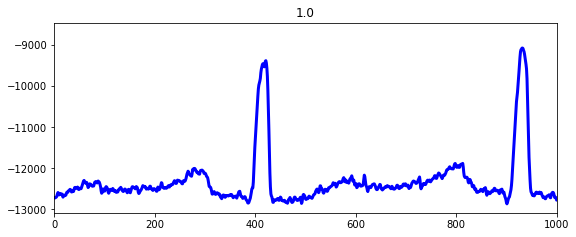

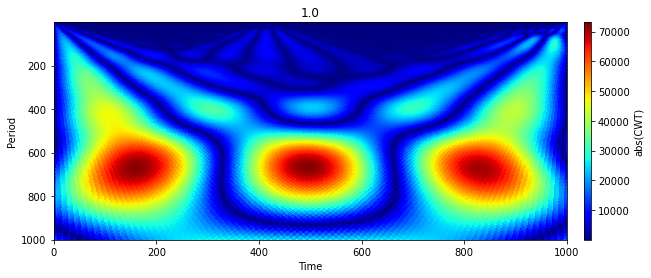

In [148]:
# Try wavelet and scaleogram function in one sample
scg.set_default_wavelet('morl')
for i in dataanclear_1.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataanclear_1.start[i]), sampto=int(dataanclear_1.end[i]))
    signal_length = 1000
    scales = scg.periods2scales( np.arange(1, signal_length+1) )
    x_values_wvt_arr = range(0,len(record.adc()),1)

    # plot the signal 
    fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
    ax1.plot(x_values_wvt_arr, record.adc(), linewidth=3, color='blue')
    ax1.set_xlim(0, signal_length)
    ax1.set_title(str(dataannclear["class"][i]))

    # the scaleogram
    scg.cws(record.adc().reshape(-1,)[:signal_length], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
            title=str(dataannclear["class"][i])); 
    if i > 10:
        break

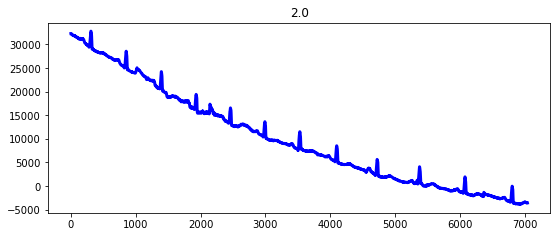

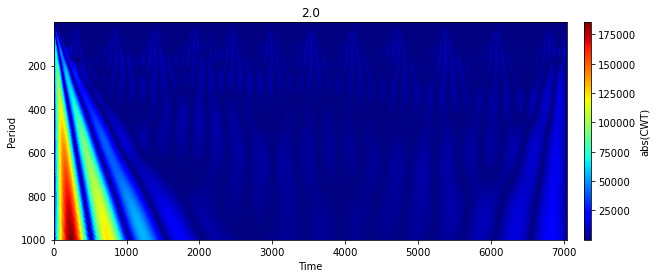

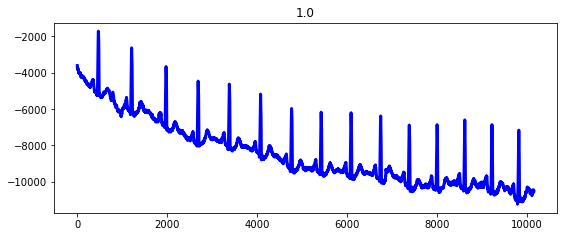

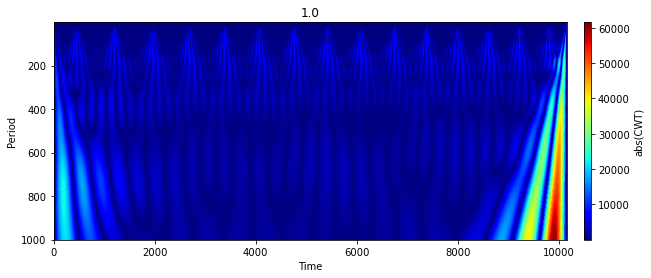

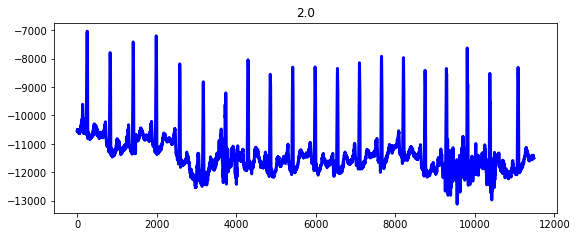

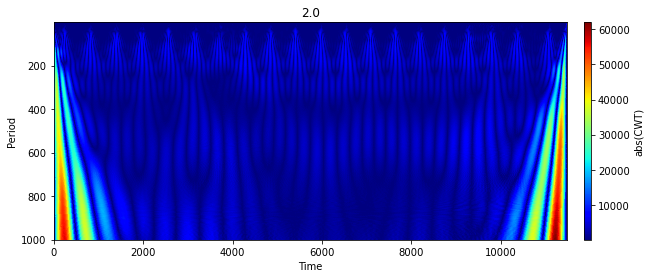

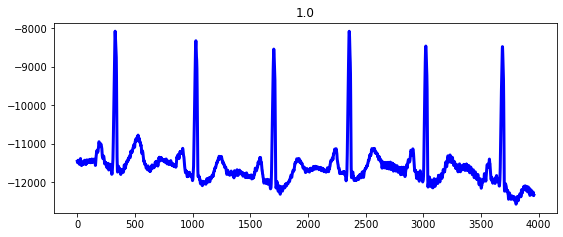

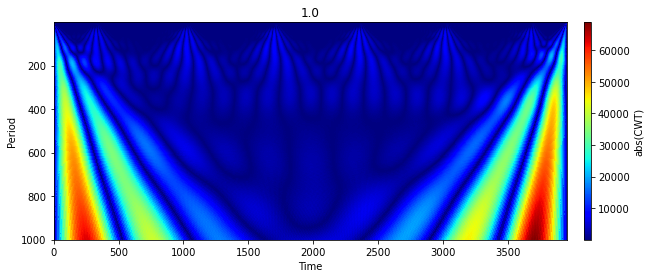

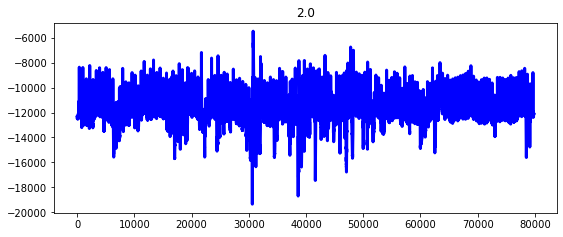

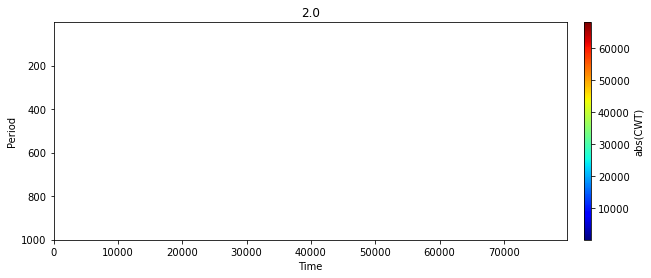

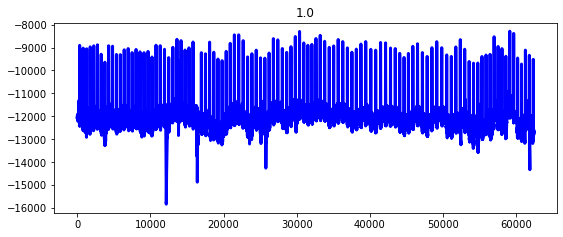

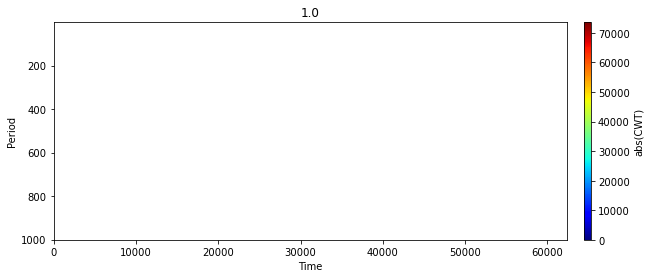

In [120]:
# Try wavelet and scaleogram function in one sample for first 5 signal
scg.set_default_wavelet('morl')
for i in dataannclear.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    signal_length = 1000
    scales = scg.periods2scales( np.arange(1, signal_length+1) )
    x_values_wvt_arr = range(0,len(record.adc()),1)

    # plot the signal 
    fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
    ax1.plot(x_values_wvt_arr, record.adc(), linewidth=3, color='blue')
    #ax1.set_xlim(0, signal_length)
    ax1.set_title(str(dataannclear["class"][i]))

    # the scaleogram
    scg.cws(record.adc().reshape(-1,), scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
            title=str(dataannclear["class"][i])); 
    if i > 4:
        break

In [107]:
# Try to find a function to split sample in equal ranges
record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[3]), sampto=int(dataannclear.end[3]))
alen = len(record.adc())//5000
for i in range(alen+1):
    print(i)
    print(record.adc()[ 0+5000*i : 5000 + 5000*i][:5])

0
[[-11454]
 [-11473]
 [-11485]
 [-11473]
 [-11475]]


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


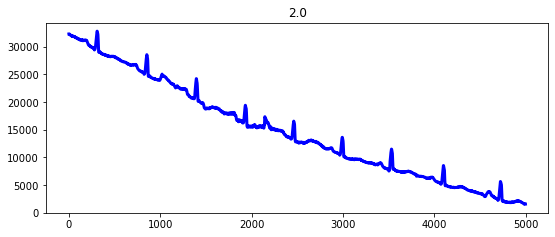

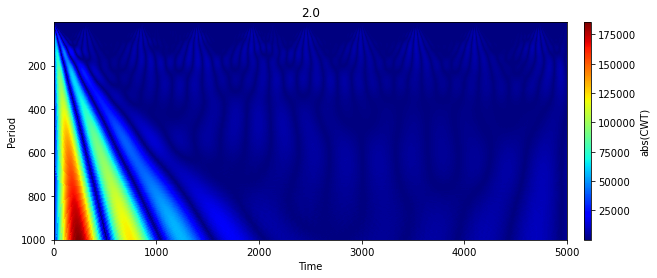

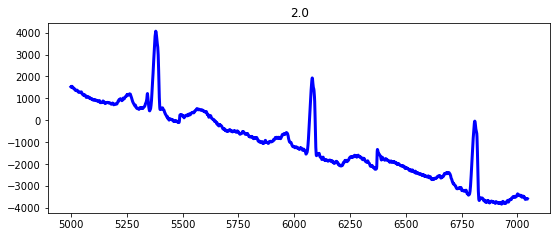

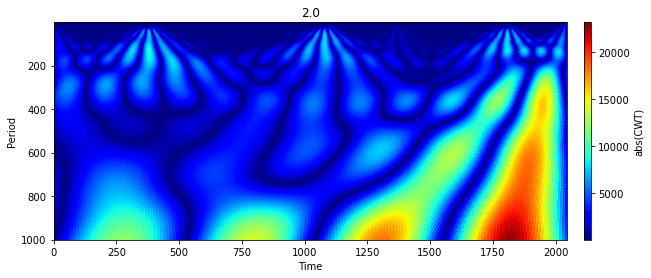

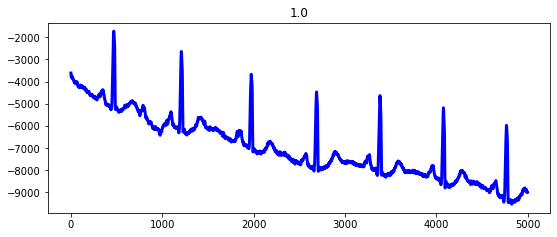

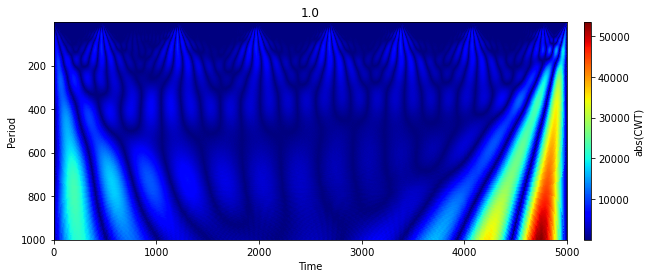

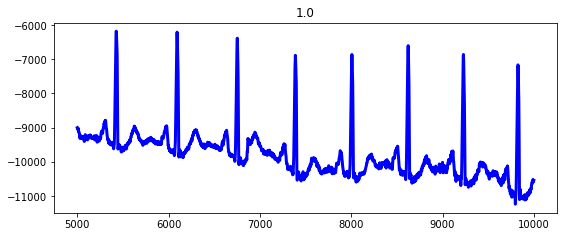

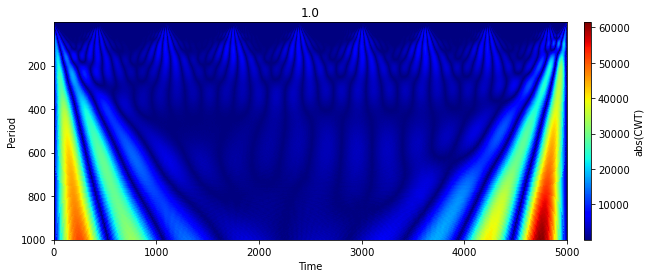

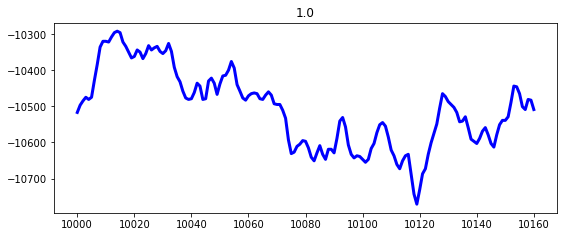

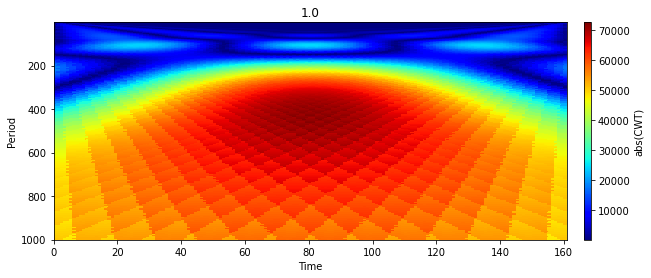

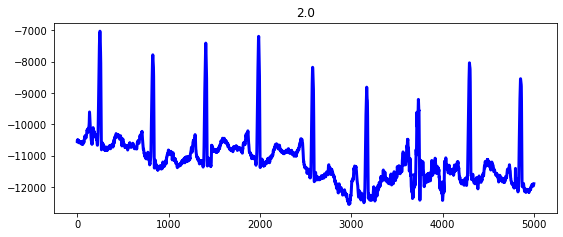

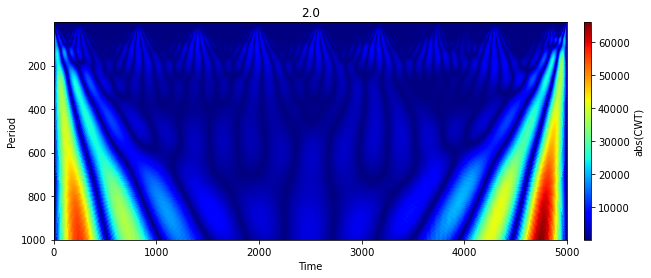

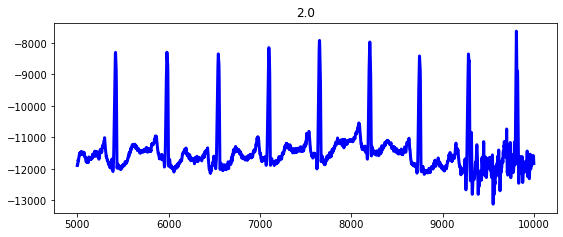

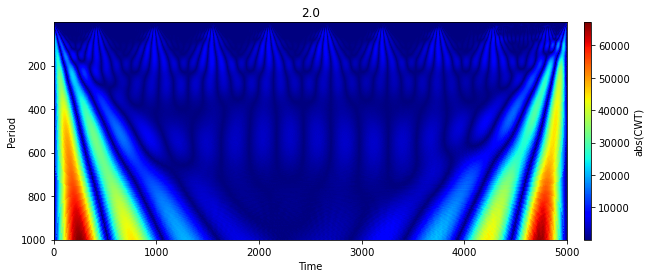

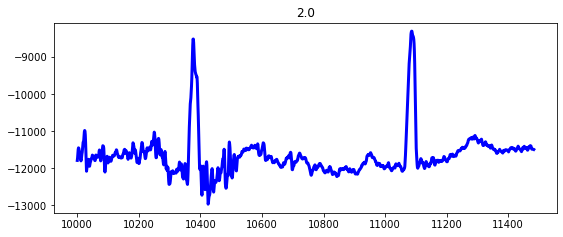

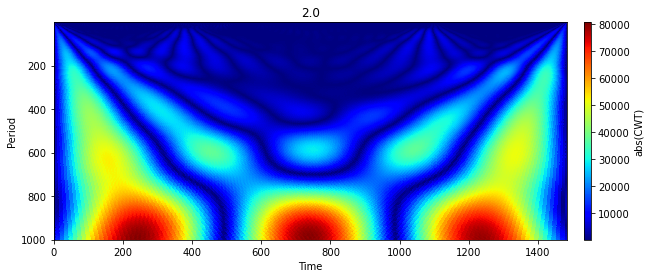

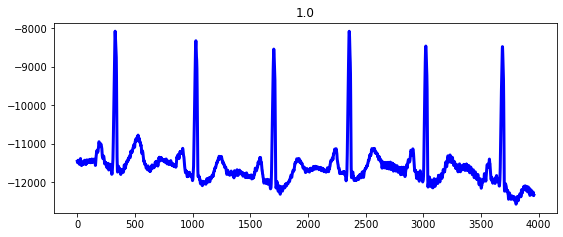

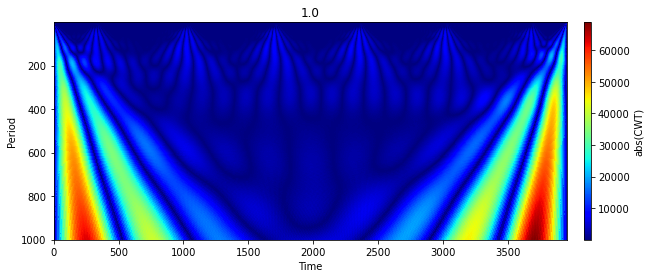

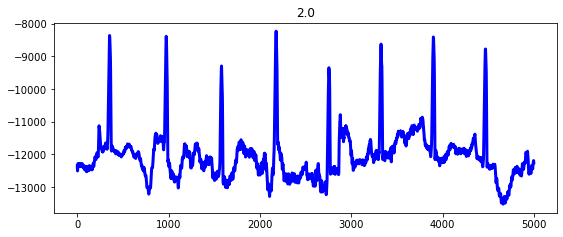

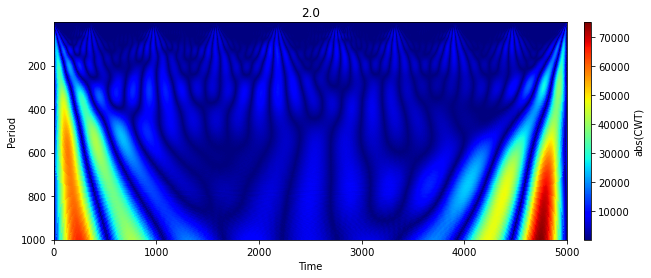

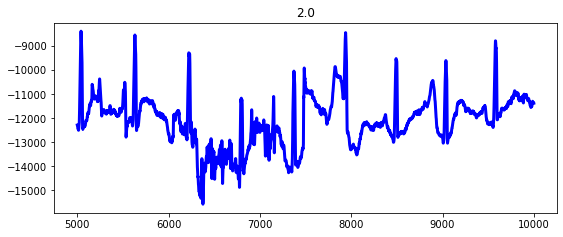

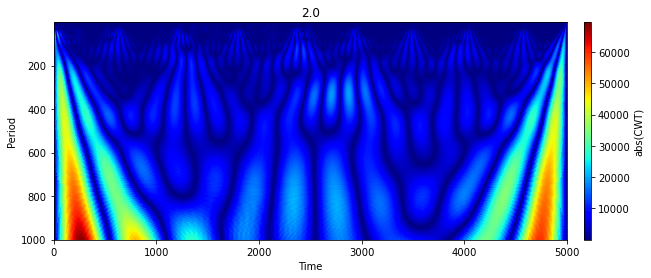

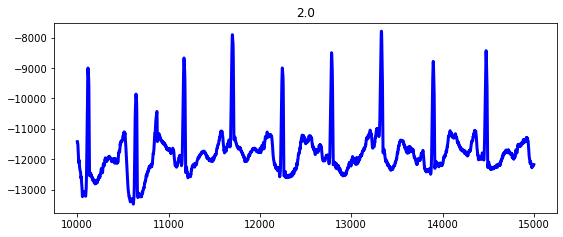

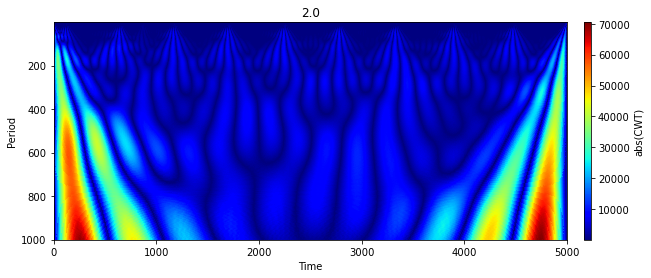

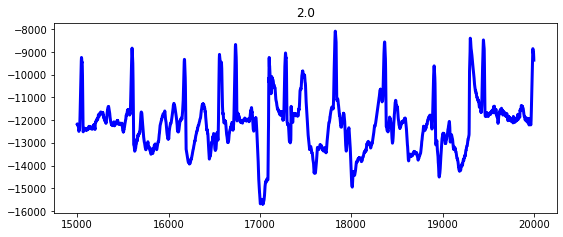

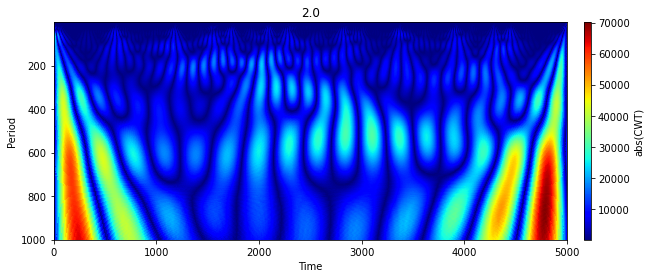

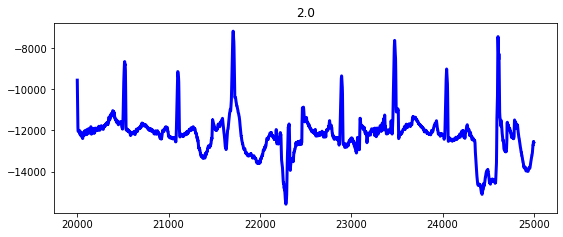

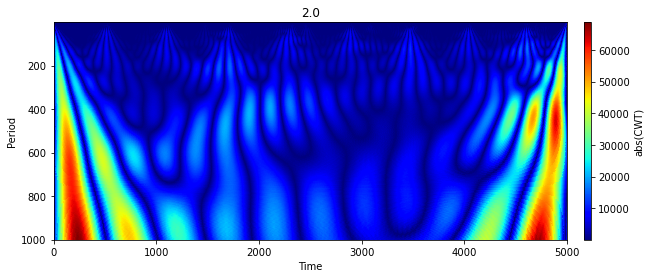

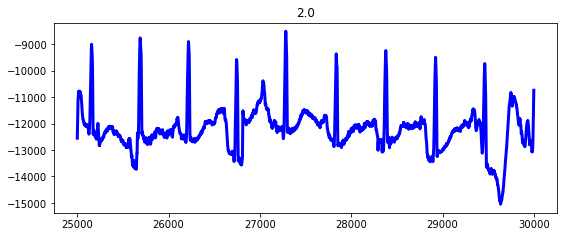

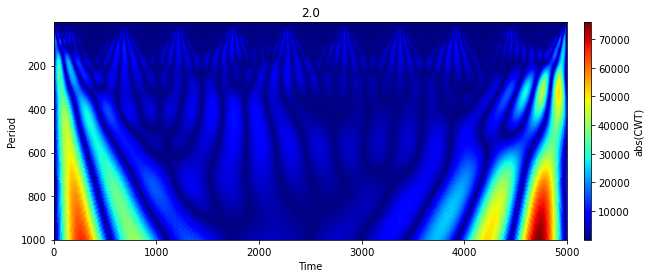

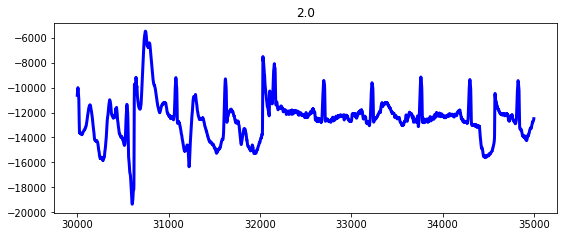

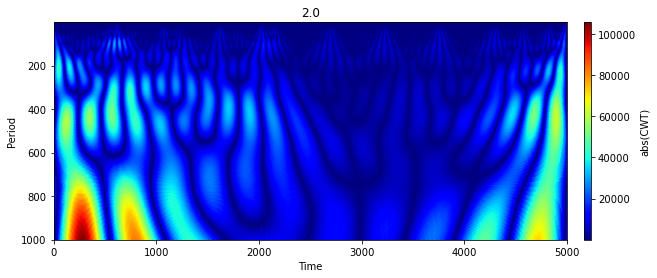

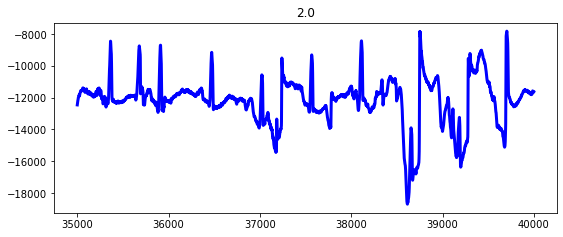

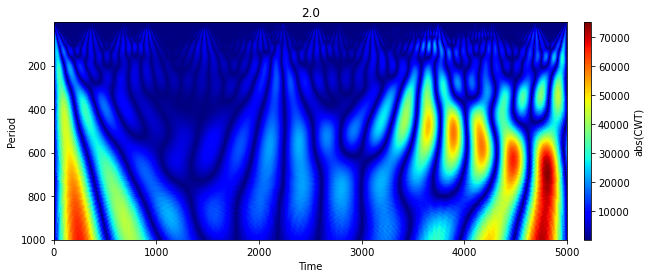

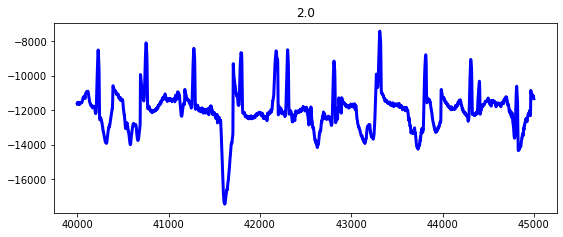

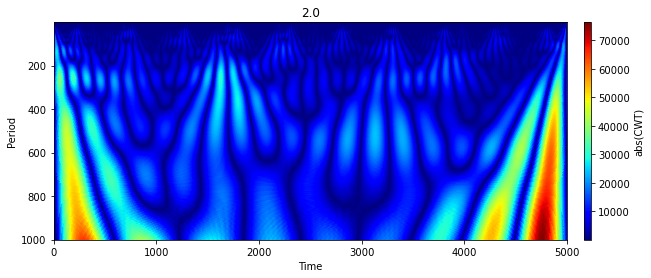

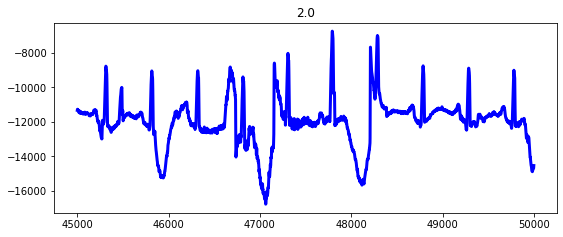

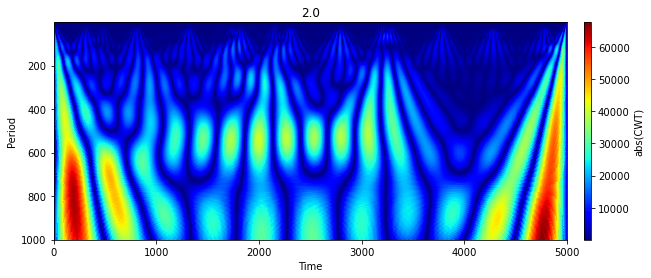

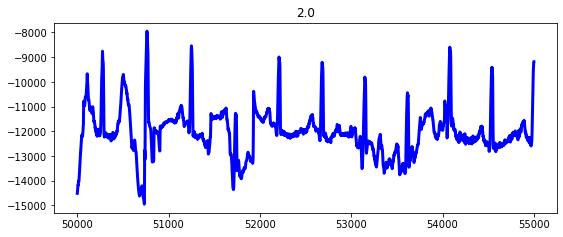

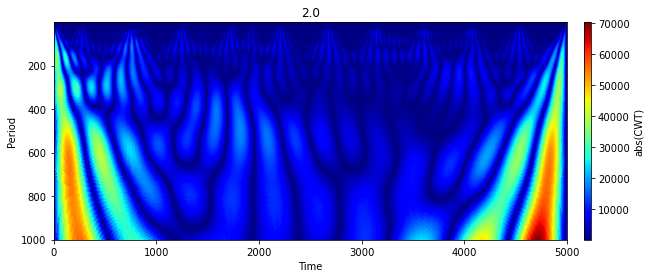

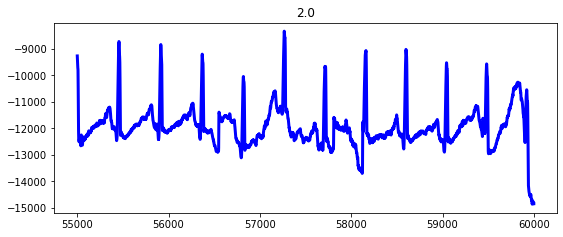

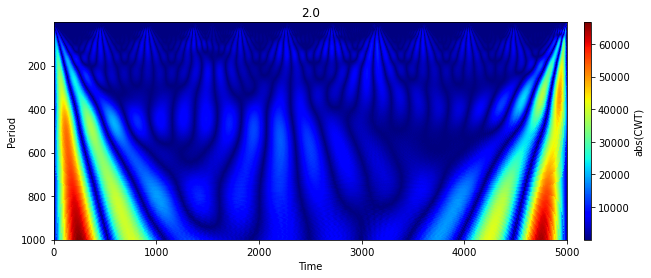

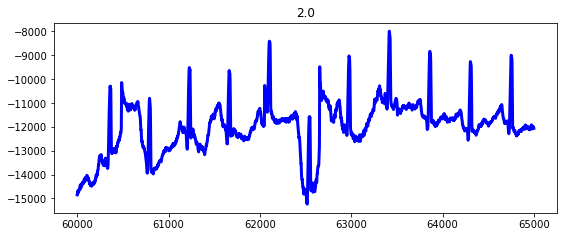

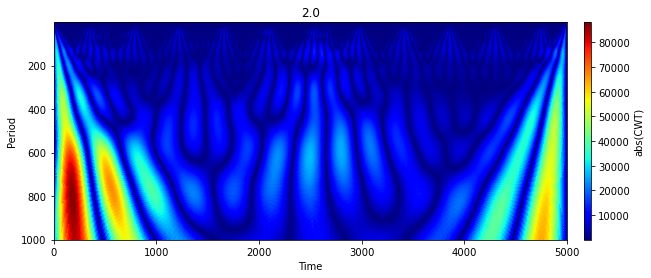

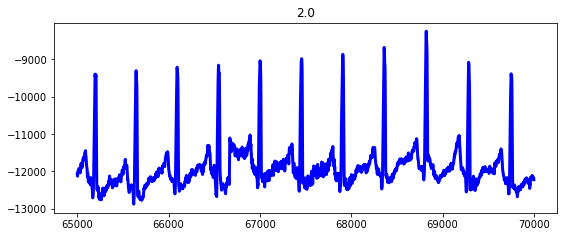

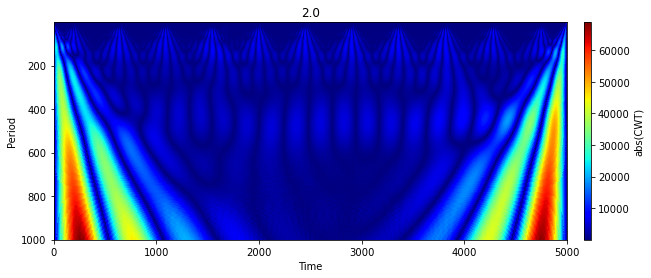

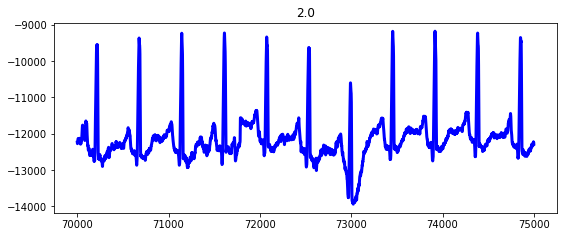

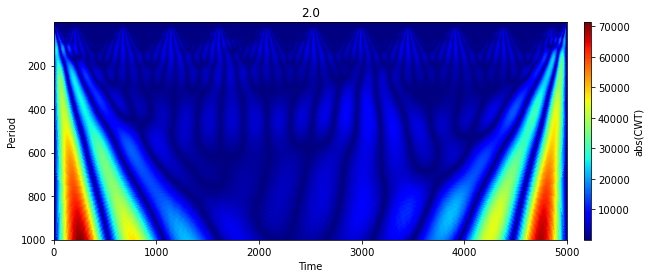

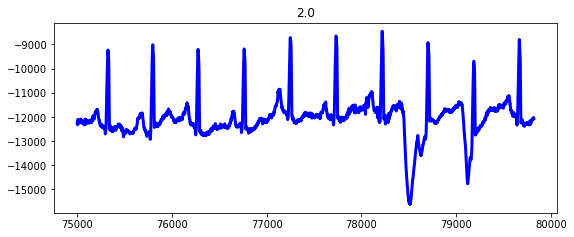

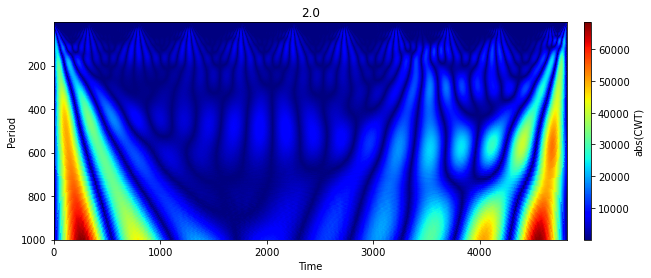

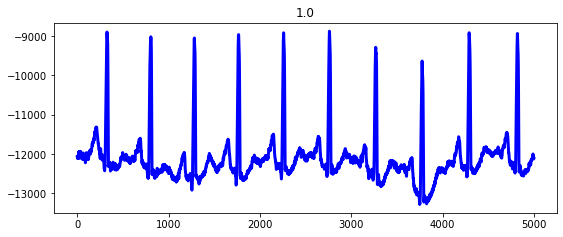

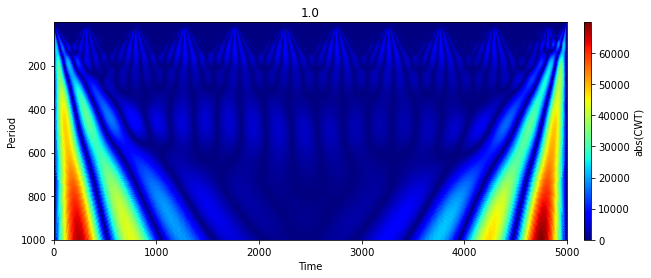

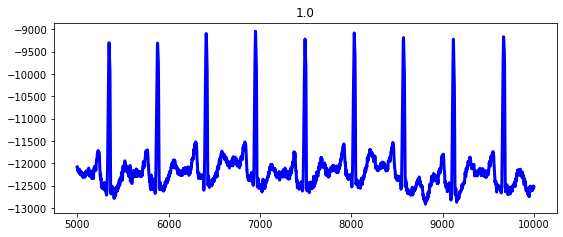

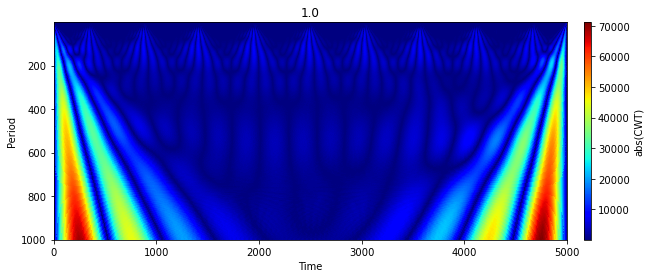

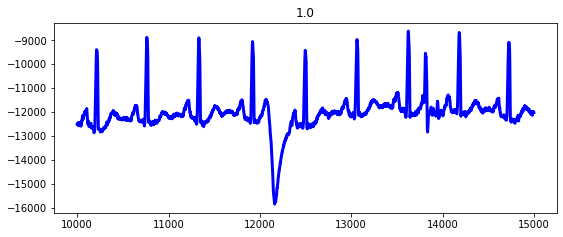

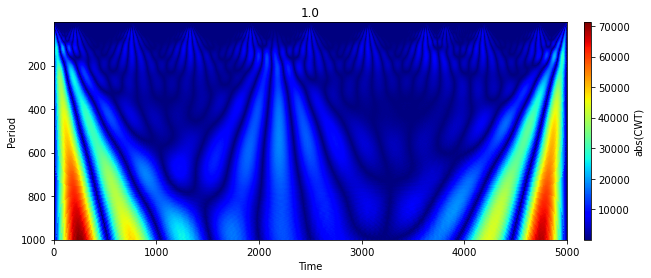

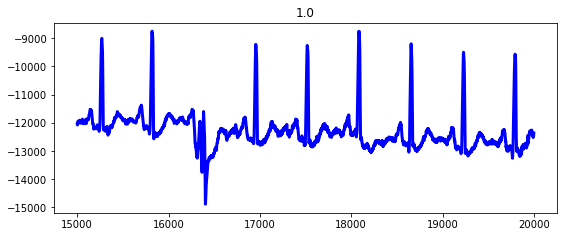

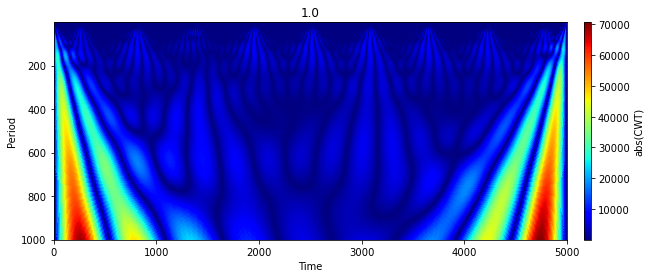

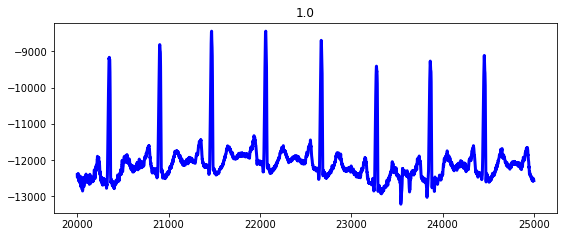

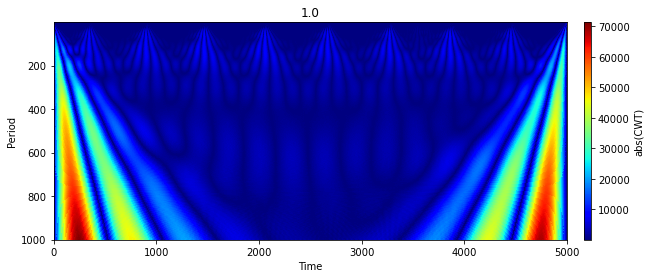

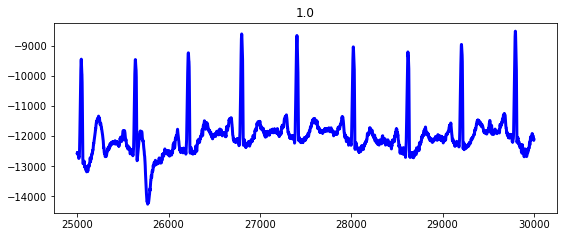

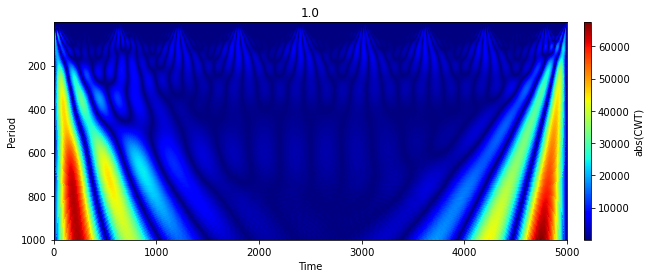

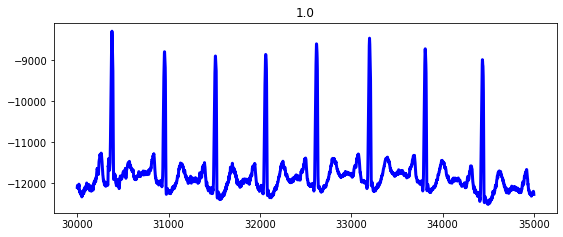

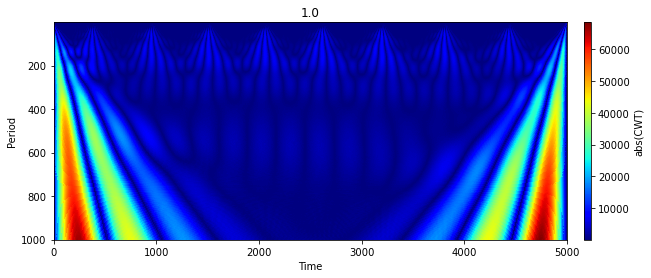

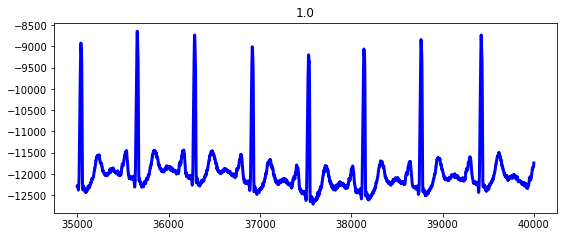

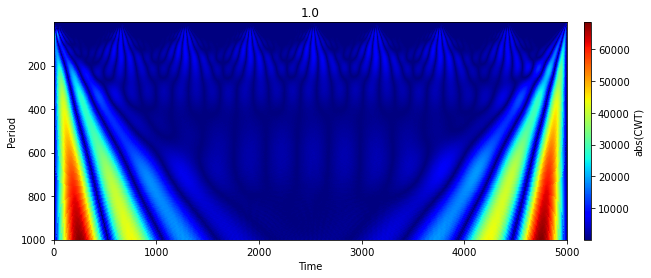

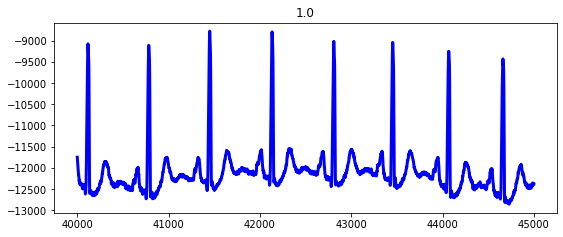

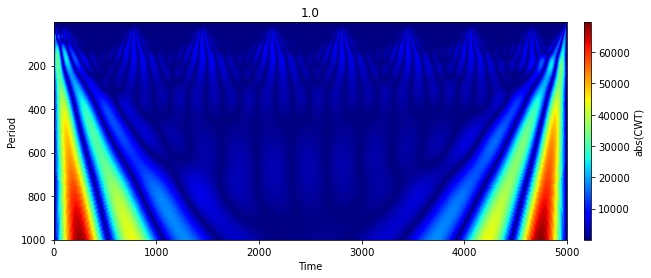

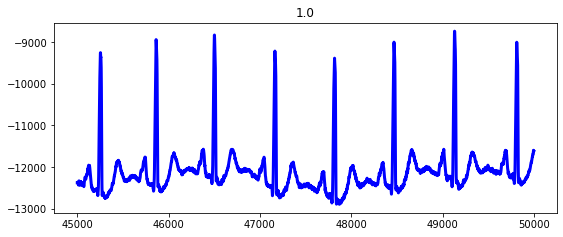

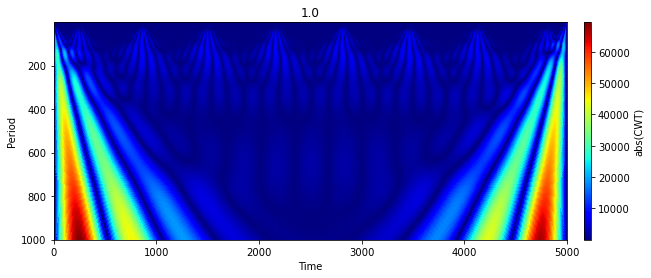

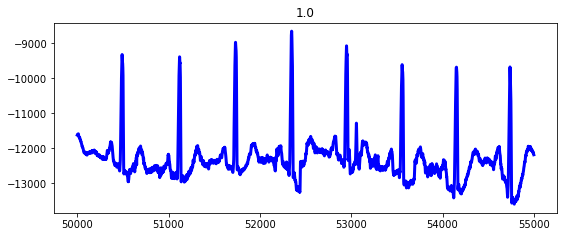

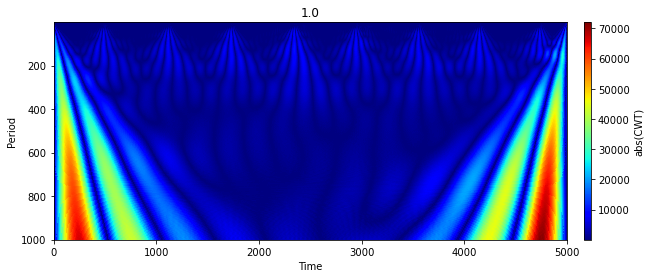

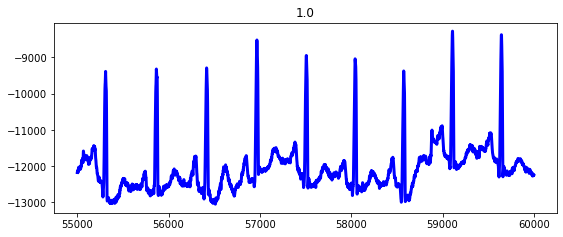

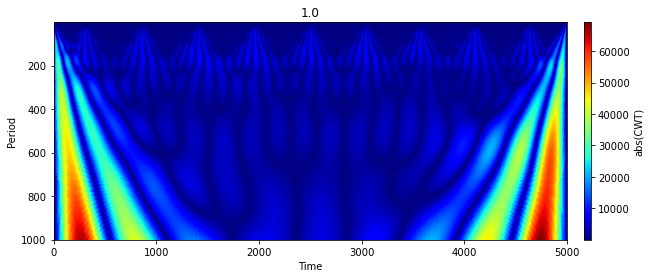

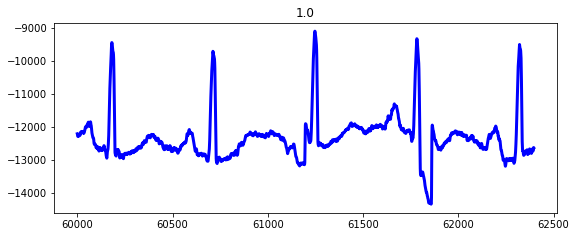

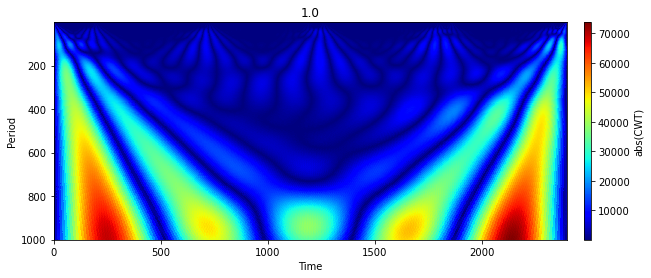

In [121]:
# Try wavelet and scaleogram function in one sample for first 5 signals splitting each 5000 ms
scg.set_default_wavelet('morl')
for i in dataannclear.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    alen = len(record.adc())//5000
    for j in range(alen+1):
        signal_length = 1000
        scales = scg.periods2scales( np.arange(1, signal_length+1) )
        x_values_wvt_arr = range(0,len(record.adc()),1)[ 0+5000*j : 5000 + 5000*j]

        # plot the signal 
        fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
        ax1.plot(x_values_wvt_arr, record.adc()[ 0+5000*j : 5000 + 5000*j], linewidth=3, color='blue')
        #ax1.set_xlim(0, signal_length)
        ax1.set_title(str(dataannclear["class"][i]))

        # the scaleogram
        scg.cws(record.adc().reshape(-1,)[ 0+5000*j : 5000 + 5000*j], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
                title=str(dataannclear["class"][i])) # 
    if i > 4:
        break

## Heartpy module test

indice : 0
class : 2.0


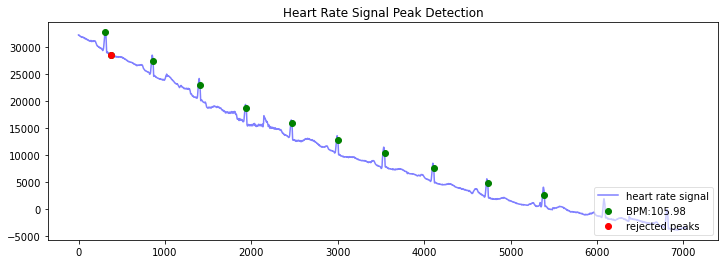

bpm: 105.983661
ibi: 566.125000
sdnn: 44.778448
sdsd: 17.920459
rmssd: 26.854103
pnn20: 0.428571
pnn50: 0.142857
hr_mad: 11.000000
sd1: 15.250293
sd2: 54.531025
s: 2612.592715
sd1/sd2: 0.279663
breathingrate: 0.220799
indice : 1
class : 1.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


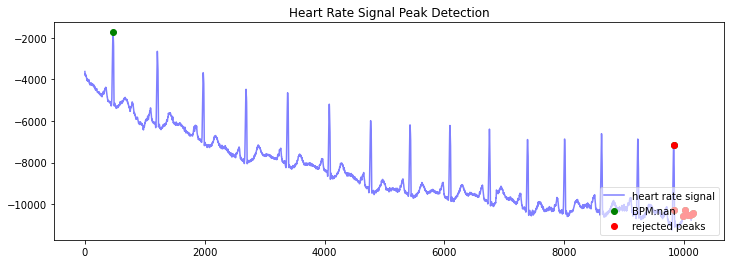

/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.


bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan
indice : 2
class : 2.0


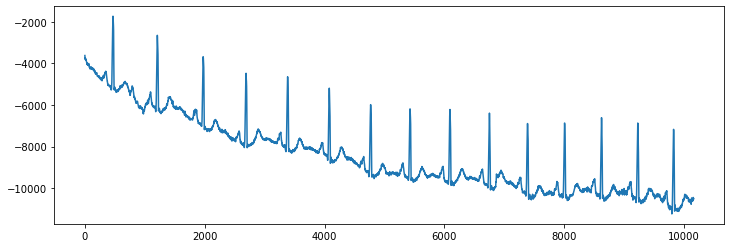

indice : 3
class : 1.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


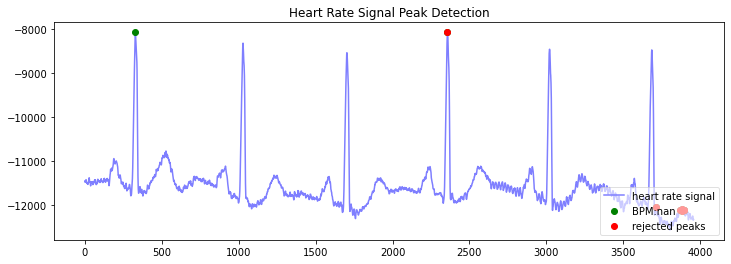

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan
indice : 4
class : 2.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


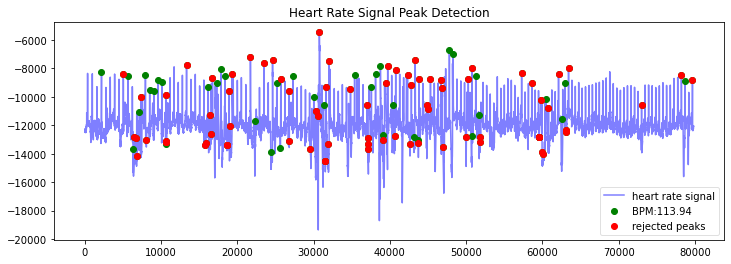

bpm: 113.944655
ibi: 526.571429
sdnn: 83.938510
sdsd: 97.249964
rmssd: 121.400165
pnn20: 0.500000
pnn50: 0.500000
hr_mad: 49.500000
sd1: 80.714173
sd2: 41.172402
s: 10440.129310
sd1/sd2: 1.960395
breathingrate: 0.678242
indice : 5
class : 1.0


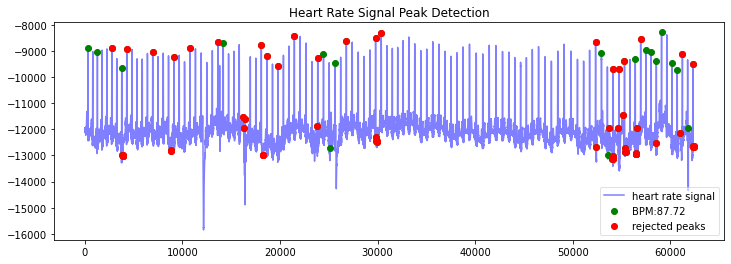

bpm: 87.719298
ibi: 684.000000
sdnn: 203.130500
sdsd: 223.456185
rmssd: 330.860494
pnn20: 0.666667
pnn50: 0.666667
hr_mad: 76.500000
sd1: 158.007384
sd2: 163.454717
s: 81138.077363
sd1/sd2: 0.966674
breathingrate: 0.182749
indice : 6
class : 2.0


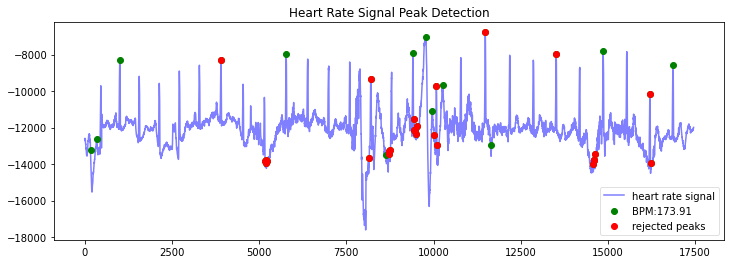

bpm: 173.913043
ibi: 345.000000
sdnn: 221.433210
sdsd: 0.000000
rmssd: 478.000000
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 17.000000
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: nan
indice : 7
class : 1.0


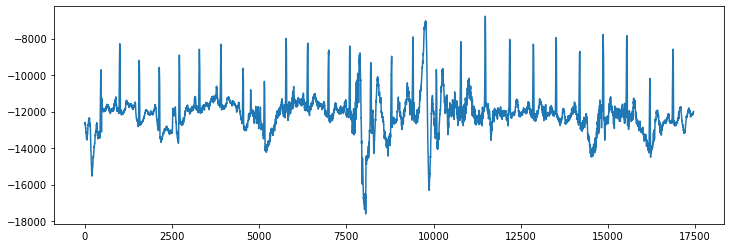

indice : 8
class : 2.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


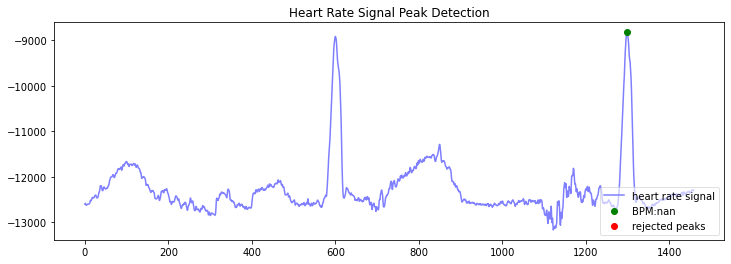

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan
indice : 9
class : 1.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.


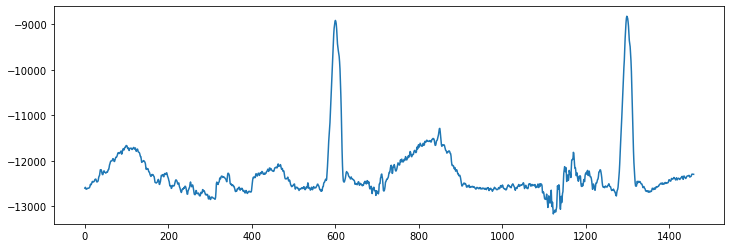

indice : 10
class : 2.0


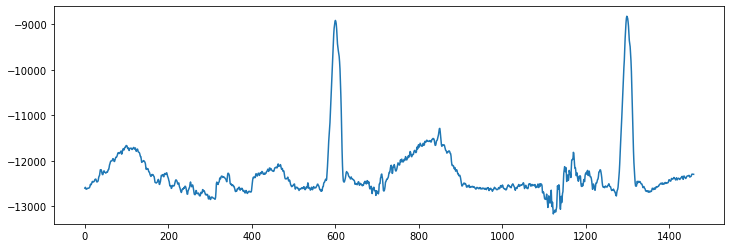

indice : 11
class : 1.0


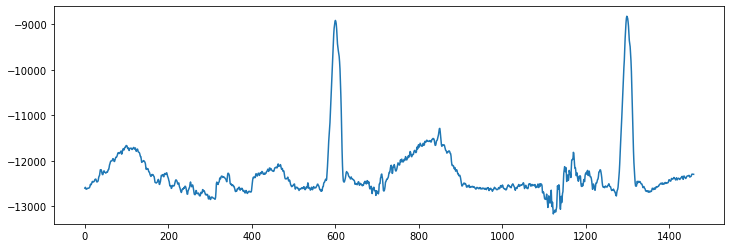

indice : 12
class : 2.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


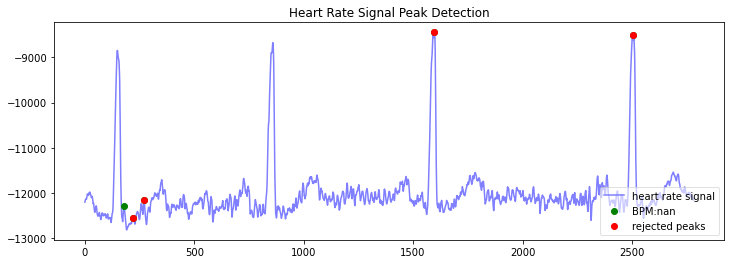

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan
indice : 13
class : 1.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.


BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


In [96]:
sample_rate = 1000 # there are recorded at 1000Hz
for i in dataannclear.index[:15]:
    print("indice :", i)
    print("class :", str(dataannclear["class"][i]))
    if i not in [2,7,9,10,11]:
        record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
        #wfdb.plot_wfdb(record=record, title=str(dataannclear["class"][i]),figsize=(10,4), ecg_grids='all')

        #run analysis
        wd, m = hp.process(record.adc().reshape(1,-1)[0], sample_rate)

        #visualise in plot of custom size
        plt.figure(figsize=(12,4))
        hp.plotter(wd, m)

        #display computed measures
        for measure in m.keys():
            print('%s: %f' %(measure, m[measure]))
    else:
        plt.figure(figsize=(12,4))
        plt.plot(record.adc().reshape(1,-1)[0])
        plt.show()
    if i > 15:
        break

In [ ]:
wd, m = hp.process(record.adc().reshape(1,-1)[0], sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [104]:
record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[9]), sampto=int(dataannclear.end[9]))

filtered = hp.filter_signal(record, cutoff = 0.005, sample_rate = sample_rate, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

IndexError: tuple index out of range

In [39]:
dataannclear[dataannclear["class1"] == 3]

start1        end1  class1      start2        end2  class2    start3  \
143  68061376.0  68171863.0     3.0  39406832.0  39550532.0     2.0  33523233   

         end3  class3       start         end  class  
143  33648459       1  39738001.0  39764743.0    1.0

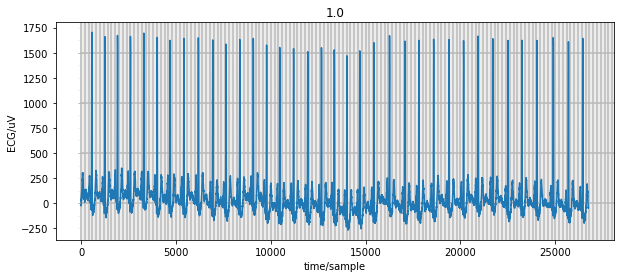

In [40]:
for i in dataannclear[dataannclear["class1"] == 3].index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataannclear["class"][i]),figsize=(10,4), ecg_grids='all')
    if i > 4:
        break

In [41]:
record = wfdb.rdrecord(record_name, sampfrom=20000, sampto=25000)

In [42]:
record.adc()

array([[-11501],
       [-11515],
       [-11537],
       ...,
       [-11475],
       [-11455],
       [-11412]])

<Figure size 1440x864 with 0 Axes>

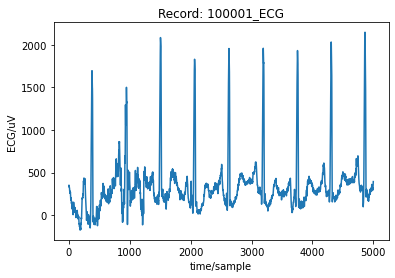

In [43]:
plt.figure(figsize=(20,12))
wfdb.plot_wfdb(record=record)

In [15]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
rcd = wfdb.rdrecord(record_name)
display(rcd.__dict__)

{'record_name': '100001_ECG',
 'n_sig': 1,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 87087000,
 'base_time': None,
 'base_date': None,
 'comments': ['ECG'],
 'sig_name': ['ECG'],
 'p_signal': array([[ 2.22905812e+04],
        [ 2.22795591e+04],
        [ 2.22805611e+04],
        ...,
        [-1.30260521e+01],
        [-2.30460922e+01],
        [-2.30460922e+01]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100001_ECG.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [1.996],
 'baseline': [-12200],
 'units': ['uV'],
 'adc_res': [0],
 'adc_zero': [0],
 'init_value': [32292],
 'checksum': [1186],
 'block_size': [0]}

In [44]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp(record_name)
display(signals)
display(fields)

array([[ 2.22905812e+04],
       [ 2.22795591e+04],
       [ 2.22805611e+04],
       ...,
       [-1.30260521e+01],
       [-2.30460922e+01],
       [-2.30460922e+01]])

{'fs': 1000,
 'sig_len': 87087000,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['uV'],
 'sig_name': ['ECG'],
 'comments': ['ECG']}

In [45]:
# Demo 3 - Read a WFDB header file only (without the signals)
record_hea = wfdb.rdheader(record_name)
display(record_hea.__dict__)

{'record_name': '100001_ECG',
 'n_sig': 1,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 87087000,
 'base_time': None,
 'base_date': None,
 'comments': ['ECG'],
 'sig_name': ['ECG'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100001_ECG.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [1.996],
 'baseline': [-12200],
 'units': ['uV'],
 'adc_res': [0],
 'adc_zero': [0],
 'init_value': [32292],
 'checksum': [1186],
 'block_size': [0]}

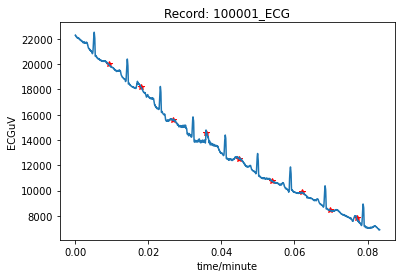

In [46]:
# Demo 4 - Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples
import wfdb
record= wfdb.rdrecord(record_name, sampto=5000)
annotation = wfdb.rdann(record_name, 'dat', sampto=5000)
wfdb.plot_wfdb(record=record,annotation=annotation, time_units='minutes')


In [19]:
# Demo 16 - List the PhysioNet Databases
dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['butqdb', 'Brno University of Technology ECG Quality Database (BUT QDB)'],
 ['capslpdb', 'CAP Sleep Database'],
 ['cdb', 'MIT-BIH ECG Compression Test Database'],
 ['cded', 'Cerebromicrovascular Disease in Elderly with Diabetes'],
 ['cebsdb', 'Combined measurement of ECG, Breathing and Seismocardiograms'],
 ['ce

In [20]:
from wfdb import processing

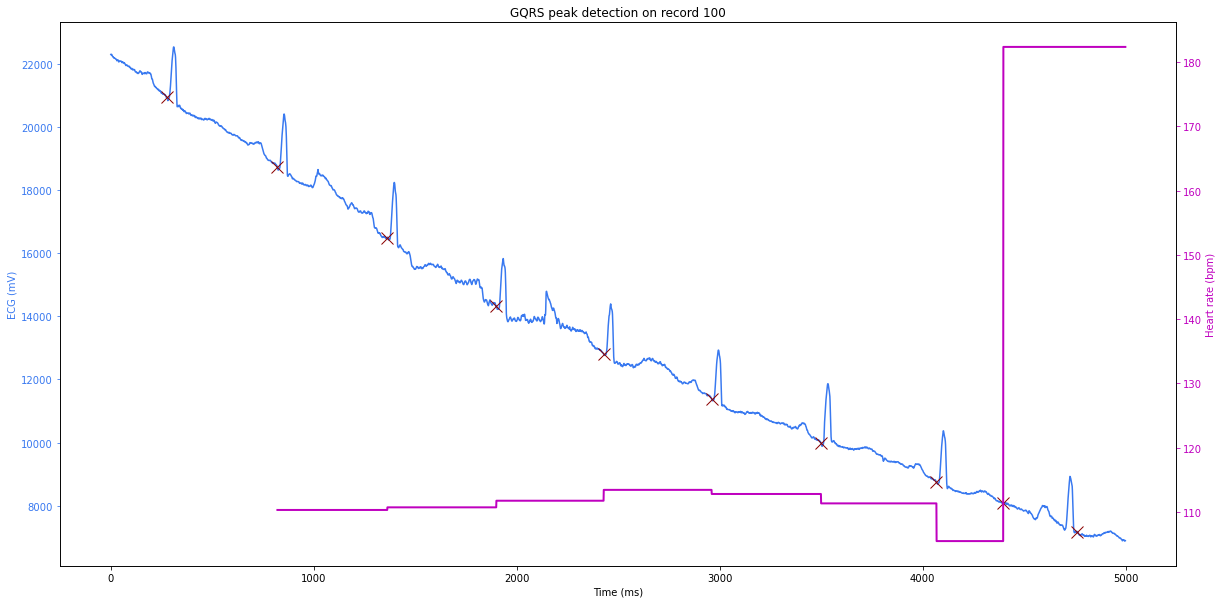

Corrected GQRS detected peak indices: [16, 854, 1397, 1933, 2463, 2994, 3533, 4102, 4613, 4998]


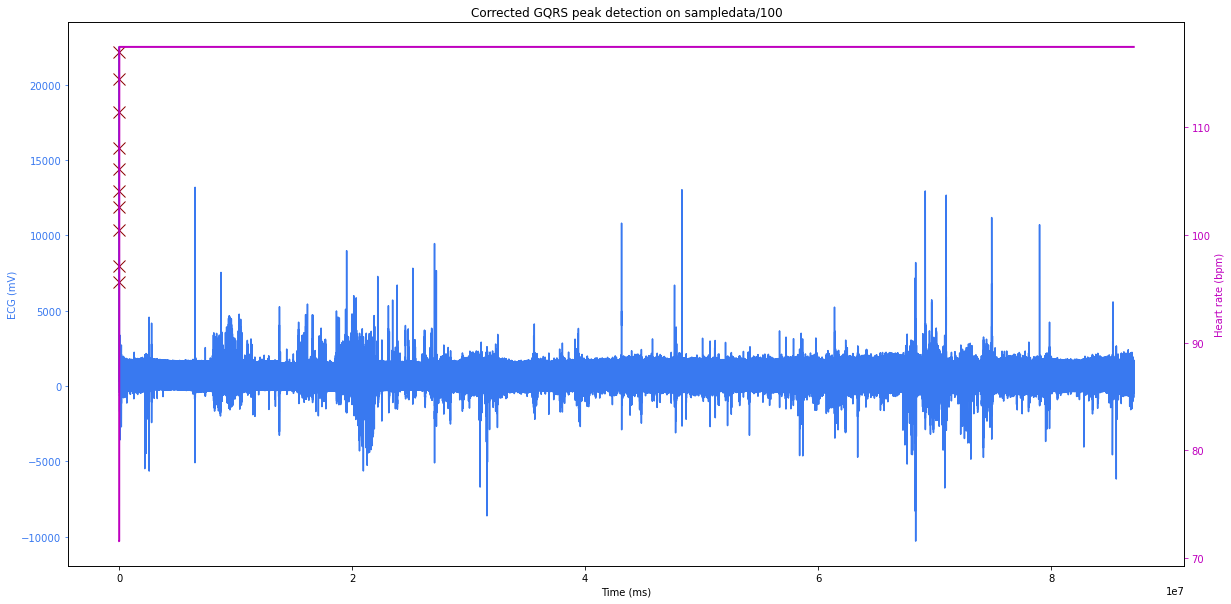

In [21]:
# Demo 19 - Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord(record_name, sampto=5000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=rcd.p_signal, peak_inds=sorted(corrected_peak_inds), fs=rcd.fs,
         title="Corrected GQRS peak detection on sampledata/100")

In [22]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord(record_name, sampto=5000)
annotation = wfdb.rdann(record_name,'hea', sampto=5000,)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

ValueError: cannot reshape array of size 87 into shape (2)

In [ ]:
wfdb.get_record_list("/Users/david/Documents/Data-Jedha.nosync/Aura/aura-data", records='all')

In [ ]:
dbs = wfdb.get_dbs()
dbs

In [ ]:
wfdb.get_record_list('butqdb')

In [ ]:
record = wfdb.rdrecord(record_name, sampto=3000)
ann = wfdb.rdann(record_name_ann, 'csv', sampto=3000)

In [ ]:

record_name_ann = "../aura-data/100001/100001_ANN"
ann = wfdb.rdann('100001/100001_ANN', 'csv',pn_dir='butqdb',return_label_elements={"s1","e1","symbol1","s2","e2","symbol2","s3","e3","symbol3","s","e","symbol"})

In [ ]:
dataann = pd.read_csv("../aura-data/100001/100001_ANN.csv")

In [ ]:
dataann.head()

In [ ]:
dataann.describe()

In [ ]:
# Demo 15 - View the standard WFDB annotation labels
wfdb.show_ann_labels()

In [ ]:
record = wfdb.rdrecord(file_name, sampto=3000)
dat = wfdb.rdann(file_name, 'dat', sampto=3000)

In [ ]:
record.adc().shape

In [ ]:
record.adc().shape

In [ ]:
record.adc()

In [ ]:
#import matplotlib.pyplot as plt
#plt.figure(num=None, figsize=(30, 15), dpi=80, facecolor='w', edgecolor='k')
wfdb.plot_wfdb(record=record, title='Record 100001') 
display(record.__dict__)

In [ ]:
record_ecg_tot = wfdb.rdrecord(file_name)
record_ecg_tot.adc().shape

In [ ]:
file_name = "../brno-university-of-technology-ecg-quality-database-but-qdb-1.0.0/100001/100001_ECG"
record_ecg = wfdb.rdrecord(file_name, sampto=3000) # , sampto=3000


In [ ]:
record_ecg.adc()

In [ ]:
wfdb.plot_wfdb(record=record_ecg, title='Record 100001') 
display(record_ecg.__dict__)

In [ ]:
record_ecg.adc()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig = px.histogram(record_ecg.adc()[:300])
fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [ ]:
df = pd.read_csv("../brno-university-of-technology-ecg-quality-database-but-qdb-1.0.0/100001/100001_ANN.csv",header=None)
df.head()

In [ ]:
df.shape

In [ ]:
!pwd